아파트 단지 내 필요한 주차대수는 ①법정주차대수 ②장래주차수요 중 큰 값에 따라 결정하게되어 있어, 정확한 ②장래주차수요의 산정을 필요로 합니다.

현재 ②장래주차수요는 ‘주차원단위’와 ‘건축연면적’을 기초로하여 산출되고 있으며, ‘주차원단위’는 신규 건축예정 부지 인근의 유사 단지를 피크 시간대 방문하여 주차된 차량대수를 세는 방법으로 조사하고 있습니다.

이 경우 인력조사로 인한 오차발생, 현장조사 시점과 실제 건축시점과의 시간차 등의 문제로 과대 또는 과소 산정의 가능성을 배제할 수 없습니다.

[주제]
🏠 유형별 임대주택 설계 시 단지 내 적정 🅿️ 주차 수요를 예측

---
4. 코드 평가

다음 조건을 만족하며 제출한 코드로 Private score가 복원된 상위 3팀에게 상금을 수여합니다.
조건 1. Private 순위 공개 후 코드 제출 기간 내 코드 코드공유 게시판 게시한 팀(설명 PPT dacon@dacon.io로 제출)
제목 양식 : 팀이름, Private 순위와 Private 점수, 모델 이름

내 용 : 전처리, 학습, 후처리, 추론 일련의 과정을 담은 코드를 게시

예시) 데이콘팀, Private 1위, Private 점수 : 5.23, ResNet

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
import os

In [2]:
os.getcwd()
os.chdir('235745_parking_data')

In [3]:
age_gender_info = pd.read_csv('age_gender_info.csv')
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [4]:
train_orig = train.copy()
test_orig = test.copy()

In [5]:
test

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754,아파트,경기도,국민임대,39.79,116,14.0,H,22830000,189840,0.0,2.0,683.0
1,C1072,754,아파트,경기도,국민임대,46.81,30,14.0,A,36048000,249930,0.0,2.0,683.0
2,C1072,754,아파트,경기도,국민임대,46.90,112,14.0,H,36048000,249930,0.0,2.0,683.0
3,C1072,754,아파트,경기도,국민임대,46.90,120,14.0,H,36048000,249930,0.0,2.0,683.0
4,C1072,754,아파트,경기도,국민임대,51.46,60,14.0,H,43497000,296780,0.0,2.0,683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,C1267,675,아파트,경상남도,행복주택,36.77,126,38.0,L,-,-,0.0,1.0,467.0
1018,C2189,382,아파트,전라북도,국민임대,29.19,96,45.0,H,6872000,106400,0.0,2.0,300.0
1019,C2189,382,아파트,전라북도,국민임대,29.19,20,45.0,H,6872000,106400,0.0,2.0,300.0
1020,C2189,382,아파트,전라북도,국민임대,39.45,202,45.0,H,13410000,144600,0.0,2.0,300.0


In [6]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2952.0,886.661247,513.540168,26.00,513.50,779.00,1106.0000,2568.0
전용면적,2952.0,44.757215,31.874280,12.62,32.10,39.93,51.5625,583.4
전용면적별세대수,2952.0,102.747967,132.640159,1.00,14.00,60.00,144.0000,1865.0
공가수,2952.0,12.921070,10.778831,0.00,4.00,11.00,20.0000,55.0
도보 10분거리 내 지하철역 수(환승노선 수 반영),2741.0,0.176578,0.427408,0.00,0.00,0.00,0.0000,3.0
도보 10분거리 내 버스정류장 수,2948.0,3.695726,2.644665,0.00,2.00,3.00,4.0000,20.0
단지내주차면수,2952.0,601.668360,396.407072,13.00,279.25,517.00,823.0000,1798.0
등록차량수,2952.0,559.768293,433.375027,13.00,220.00,487.00,770.0000,2550.0


In [8]:
sample_submission

,code,num
0,C1072,0
1,C1128,0
2,C1456,0
3,C1840,0
4,C1332,0
...,...,...
145,C2456,0
146,C1266,0
147,C2152,0
148,C1267,0


In [9]:
age_gender_info

,지역,10대미만(여자),10대미만(남자),10대(여자),10대(남자),20대(여자),20대(남자),30대(여자),30대(남자),40대(여자),...,60대(여자),60대(남자),70대(여자),70대(남자),80대(여자),80대(남자),90대(여자),90대(남자),100대(여자),100대(남자)
0,경상북도,0.030158,0.033195,0.056346,0.061360,0.060096,0.067859,0.053433,0.049572,0.083660,...,0.082684,0.063889,0.047717,0.030172,0.029361,0.011211,0.005578,0.001553,0.000234,0.000014
1,경상남도,0.027400,0.026902,0.053257,0.055568,0.064920,0.070618,0.056414,0.057550,0.077092,...,0.087201,0.069562,0.048357,0.033277,0.027361,0.011295,0.004910,0.001086,0.000179,0.000010
2,대전광역시,0.028197,0.029092,0.040490,0.042793,0.060834,0.064247,0.068654,0.066848,0.074667,...,0.088468,0.070261,0.051010,0.037143,0.032455,0.013751,0.006494,0.001740,0.000298,0.000066
3,경기도,0.038030,0.039507,0.052546,0.053990,0.058484,0.059894,0.072331,0.068704,0.083208,...,0.074237,0.058419,0.042422,0.032725,0.025136,0.012354,0.005390,0.001707,0.000290,0.000067
4,전라북도,0.028089,0.029065,0.059685,0.060080,0.066262,0.070322,0.052027,0.046596,0.077005,...,0.076636,0.068042,0.051025,0.035748,0.035049,0.012641,0.007223,0.001898,0.000158,0.000013
5,강원도,0.028888,0.030682,0.051287,0.052712,0.060374,0.063157,0.059821,0.054321,0.076201,...,0.088423,0.070014,0.047732,0.032760,0.033515,0.013027,0.007628,0.001677,0.000319,0.000017
6,광주광역시,0.031994,0.034566,0.049851,0.050254,0.065084,0.066875,0.066888,0.064416,0.080028,...,0.075930,0.059586,0.048552,0.031754,0.029749,0.010341,0.006343,0.000895,0.000353,0.000013
7,충청남도,0.031369,0.031711,0.059077,0.062422,0.067975,0.072622,0.065095,0.067303,0.078860,...,0.070278,0.057692,0.042296,0.028682,0.024514,0.010900,0.005429,0.001549,0.000219,0.000123
8,부산광역시,0.022003,0.022947,0.032681,0.035512,0.053796,0.057233,0.047049,0.048866,0.061952,...,0.109297,0.085294,0.078743,0.053388,0.047908,0.020228,0.008043,0.002240,0.000268,0.000028
9,제주특별자치도,0.034690,0.036695,0.060094,0.063080,0.069135,0.069667,0.050808,0.048026,0.080548,...,0.074248,0.055717,0.047944,0.033054,0.026836,0.011332,0.006832,0.000982,0.000368,0.000082


In [10]:
train.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              0
임대보증금                           569
임대료                             569
도보 10분거리 내 지하철역 수(환승노선 수 반영)    211
도보 10분거리 내 버스정류장 수                4
단지내주차면수                           0
등록차량수                             0
dtype: int64

In [11]:
test.isna().sum()

단지코드                              0
총세대수                              0
임대건물구분                            0
지역                                0
공급유형                              0
전용면적                              0
전용면적별세대수                          0
공가수                               0
자격유형                              2
임대보증금                           180
임대료                             180
도보 10분거리 내 지하철역 수(환승노선 수 반영)     42
도보 10분거리 내 버스정류장 수                0
단지내주차면수                           0
dtype: int64

In [12]:
train.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수', '등록차량수'
]

test.columns = [
    '단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수', '신분',
    '임대보증금', '임대료', '지하철', '버스',
    '단지내주차면수'
]

In [13]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
총세대수,2952.0,886.661247,513.540168,26.00,513.50,779.00,1106.0000,2568.0
전용면적,2952.0,44.757215,31.874280,12.62,32.10,39.93,51.5625,583.4
전용면적별세대수,2952.0,102.747967,132.640159,1.00,14.00,60.00,144.0000,1865.0
공가수,2952.0,12.921070,10.778831,0.00,4.00,11.00,20.0000,55.0
지하철,2741.0,0.176578,0.427408,0.00,0.00,0.00,0.0000,3.0
버스,2948.0,3.695726,2.644665,0.00,2.00,3.00,4.0000,20.0
단지내주차면수,2952.0,601.668360,396.407072,13.00,279.25,517.00,823.0000,1798.0
등록차량수,2952.0,559.768293,433.375027,13.00,220.00,487.00,770.0000,2550.0


In [14]:
local_map = {}
for i, loc in enumerate(train['지역'].unique()):
    local_map[loc] = i

In [15]:
local_map

{'경상북도': 0,
 '경상남도': 1,
 '대전광역시': 2,
 '경기도': 3,
 '전라북도': 4,
 '강원도': 5,
 '광주광역시': 6,
 '충청남도': 7,
 '부산광역시': 8,
 '제주특별자치도': 9,
 '울산광역시': 10,
 '충청북도': 11,
 '전라남도': 12,
 '대구광역시': 13,
 '서울특별시': 14,
 '세종특별자치시': 15}

In [16]:
train['전용면적'] = train['전용면적']//5*5
test['전용면적'] = test['전용면적']//5*5

In [17]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,35.0,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,35.0,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,50.0,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,50.0,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,50.0,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [18]:
idx = train[train['전용면적']>100].index
train.loc[idx, '전용면적'] = 100
idx = test[test['전용면적']>100].index
test.loc[idx, '전용면적'] = 100

idx = train[train['전용면적']<15].index
train.loc[idx, '전용면적'] = 15
idx = test[test['전용면적']<15].index
test.loc[idx, '전용면적'] = 15

In [19]:
test['전용면적'].unique()

array([ 35.,  45.,  50.,  30.,  55.,  25.,  75., 100.,  15.,  20.,  40.,
        60.,  80.,  70.])

In [20]:
columns = ['단지코드', '총세대수', '공가수', '지역', '단지내주차면수', '지하철', '버스']
target = '등록차량수'
area_columns = []
for area in train['전용면적'].unique():
    area_columns.append(f'면적_{area}')

In [21]:
area_columns

['면적_35.0',
 '면적_50.0',
 '면적_55.0',
 '면적_30.0',
 '면적_45.0',
 '면적_40.0',
 '면적_25.0',
 '면적_70.0',
 '면적_15.0',
 '면적_20.0',
 '면적_100.0',
 '면적_60.0',
 '면적_75.0',
 '면적_80.0',
 '면적_65.0']

In [22]:
new_train = pd.DataFrame()
new_test = pd.DataFrame()

In [23]:
from tqdm import tqdm
for i, code in tqdm(enumerate(train['단지코드'].unique())):
    temp = train[train['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_train.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_train.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()
    
    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']
    
for i, code in tqdm(enumerate(test['단지코드'].unique())):
    temp = test[test['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_test.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_test.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()

423it [00:07, 55.53it/s]
150it [00:03, 47.90it/s]


In [24]:
new_train.head().T

,0,1,2,3,4
단지코드,C2483,C2515,C1407,C1945,C1470
총세대수,900.0,545.0,1216.0,755.0,696.0
공가수,38.0,17.0,13.0,6.0,14.0
지역,경상북도,경상남도,대전광역시,경기도,전라북도
단지내주차면수,1425.0,624.0,1285.0,734.0,645.0
지하철,0.0,0.0,1.0,1.0,0.0
버스,3.0,3.0,1.0,3.0,2.0
면적_35.0,149.0,80.0,0.0,240.0,254.0
면적_50.0,665.0,132.0,124.0,303.0,246.0
면적_55.0,86.0,0.0,0.0,212.0,0.0


In [25]:
new_train = new_train.fillna(-1)
new_test = new_test.fillna(-1)

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
new_train['지역'] = label_encoder.fit_transform(new_train['지역'])

new_train.head()

,단지코드,총세대수,공가수,지역,단지내주차면수,지하철,버스,면적_35.0,면적_50.0,면적_55.0,...,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0,등록차량수
0,C2483,900.0,38.0,3,1425.0,0.0,3.0,149.0,665.0,86.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1015.0
1,C2515,545.0,17.0,2,624.0,0.0,3.0,80.0,132.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0
2,C1407,1216.0,13.0,6,1285.0,1.0,1.0,0.0,124.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1064.0
3,C1945,755.0,6.0,1,734.0,1.0,3.0,240.0,303.0,212.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,730.0
4,C1470,696.0,14.0,12,645.0,0.0,2.0,254.0,246.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,553.0


In [27]:
new_test['지역'] = label_encoder.fit_transform(new_test['지역'])
new_test.head()

,단지코드,총세대수,공가수,지역,단지내주차면수,지하철,버스,면적_35.0,면적_50.0,면적_55.0,...,면적_40.0,면적_25.0,면적_70.0,면적_15.0,면적_20.0,면적_100.0,면적_60.0,면적_75.0,면적_80.0,면적_65.0
0,C1072,754.0,14.0,1,683.0,0.0,2.0,116.0,376.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C1128,1354.0,9.0,1,1216.0,0.0,3.0,420.0,578.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C1456,619.0,18.0,7,547.0,0.0,16.0,165.0,132.0,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C1840,593.0,7.0,11,543.0,0.0,3.0,335.0,84.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C1332,1297.0,11.0,1,1112.0,0.0,2.0,425.0,304.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
x_train = new_train.iloc[:, 1:-1]
y_train = new_train.iloc[:,-1]
x_test = new_test.iloc[:,1:]

In [29]:
model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [30]:
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [31]:
pred = model.predict(x_test)

In [32]:
submission = sample_submission.copy()

In [33]:
submission['num'] = pred

In [34]:
submission.to_csv('submission.csv', index=False)

In [35]:
submission.head()

,code,num
0,C1072,701.64
1,C1128,1241.71
2,C1456,464.14
3,C1840,515.14
4,C1332,1064.85


---
# EDA

In [36]:
# age_gender_info = pd.read_csv('age_gender_info.csv')
# sample_submission = pd.read_csv('sample_submission.csv')
# test = pd.read_csv('test.csv')
# train = pd.read_csv('train.csv')

In [37]:
new_train.head(10).T

,0,1,2,3,4,5,6,7,8,9
단지코드,C2483,C2515,C1407,C1945,C1470,C1898,C1244,C1171,C2073,C2513
총세대수,900.0,545.0,1216.0,755.0,696.0,566.0,1722.0,624.0,361.0,754.0
공가수,38.0,17.0,13.0,6.0,14.0,9.0,10.0,13.0,13.0,15.0
지역,3,2,6,1,12,12,1,6,0,4
단지내주차면수,1425.0,624.0,1285.0,734.0,645.0,517.0,1483.0,634.0,288.0,530.0
지하철,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
버스,3.0,3.0,1.0,3.0,2.0,6.0,10.0,5.0,5.0,6.0
면적_35.0,149.0,80.0,0.0,240.0,254.0,271.0,788.0,164.0,168.0,0.0
면적_50.0,665.0,132.0,124.0,303.0,246.0,86.0,390.0,40.0,0.0,754.0
면적_55.0,86.0,0.0,0.0,212.0,0.0,0.0,0.0,0.0,40.0,0.0


In [38]:
new_test.head(10).T

,0,1,2,3,4,5,6,7,8,9
단지코드,C1072,C1128,C1456,C1840,C1332,C1563,C1794,C1640,C1377,C2072
총세대수,754.0,1354.0,619.0,593.0,1297.0,1974.0,1349.0,533.0,470.0,353.0
공가수,14.0,9.0,18.0,7.0,11.0,15.0,25.0,17.0,18.0,6.0
지역,1,1,7,11,1,1,11,11,2,2
단지내주차면수,683.0,1216.0,547.0,543.0,1112.0,1696.0,1098.0,470.0,384.0,280.0
지하철,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
버스,2.0,3.0,16.0,3.0,2.0,6.0,2.0,1.0,4.0,1.0
면적_35.0,116.0,420.0,165.0,335.0,425.0,719.0,656.0,87.0,234.0,0.0
면적_50.0,376.0,578.0,132.0,84.0,304.0,599.0,0.0,272.0,104.0,90.0
면적_55.0,0.0,0.0,44.0,0.0,0.0,0.0,148.0,174.0,0.0,0.0


단지내 주차면수 vs 등록차량수 ( 주차면수 < 차량수 이면 주차부족)


In [39]:
temp = new_train.query('단지내주차면수 < 등록차량수').groupby('지역')

In [40]:
# temp = 

In [41]:
temp.agg({'단지내주차면수': np.mean, '등록차량수': np.mean})

,단지내주차면수,등록차량수
지역,,
0,357.809524,453.952381
1,680.640000,812.100000
2,531.727273,665.500000
3,518.714286,621.785714
4,567.750000,756.500000
5,692.666667,934.888889
6,815.625000,1034.250000
7,307.500000,373.000000
8,884.833333,924.500000


In [42]:
temp.agg({'단지내주차면수': np.max, '등록차량수': np.max})

,단지내주차면수,등록차량수
지역,,
0,936.0,1084.0
1,1798.0,2550.0
2,958.0,1359.0
3,1117.0,1255.0
4,1202.0,1730.0
5,1201.0,1653.0
6,1636.0,2315.0
7,375.0,382.0
8,1590.0,1595.0


In [43]:
temp.agg({'단지내주차면수': np.min, '등록차량수': np.min})

,단지내주차면수,등록차량수
지역,,
0,88.0,90.0
1,212.0,281.0
2,226.0,254.0
3,153.0,163.0
4,54.0,59.0
5,217.0,340.0
6,408.0,444.0
7,240.0,364.0
8,362.0,382.0


In [44]:
temp.agg({'단지내주차면수': np.count_nonzero, '등록차량수': np.count_nonzero})

,단지내주차면수,등록차량수
지역,,
0,21.0,21.0
1,50.0,50.0
2,22.0,22.0
3,14.0,14.0
4,16.0,16.0
5,9.0,9.0
6,8.0,8.0
7,2.0,2.0
8,6.0,6.0


In [45]:
tmp = pd.DataFrame()
tmp['지역_count'] = train.groupby(['지역']).단지코드.count()

In [46]:
tmp['more_car'] = train.query('단지내주차면수 < 등록차량수').groupby('지역').count().단지코드

In [47]:
tmp['percent_saturated'] = (tmp.more_car / tmp.지역_count)

In [48]:
tmp

,지역_count,more_car,percent_saturated
지역,,,
강원도,187,99,0.529412
경기도,621,331,0.533011
경상남도,369,112,0.303523
경상북도,119,77,0.647059
광주광역시,141,82,0.581560
대구광역시,102,54,0.529412
대전광역시,266,55,0.206767
부산광역시,328,26,0.079268
서울특별시,64,43,0.671875


In [49]:
tmp.columns=['지역_total_cnt','지역_more등록차량_cnt','지역_more차량_cnt_percent']

In [50]:
tmp

,지역_total_cnt,지역_more등록차량_cnt,지역_more차량_cnt_percent
지역,,,
강원도,187,99,0.529412
경기도,621,331,0.533011
경상남도,369,112,0.303523
경상북도,119,77,0.647059
광주광역시,141,82,0.581560
대구광역시,102,54,0.529412
대전광역시,266,55,0.206767
부산광역시,328,26,0.079268
서울특별시,64,43,0.671875


In [51]:
tmp.loc[tmp['지역_more차량_cnt_percent'] >= 0.5]

,지역_total_cnt,지역_more등록차량_cnt,지역_more차량_cnt_percent
지역,,,
강원도,187,99,0.529412
경기도,621,331,0.533011
경상북도,119,77,0.647059
광주광역시,141,82,0.581560
대구광역시,102,54,0.529412
서울특별시,64,43,0.671875
세종특별자치시,47,47,1.000000
전라남도,151,77,0.509934


In [52]:
tmp.loc[tmp['지역_more차량_cnt_percent'] < 0.5]

,지역_total_cnt,지역_more등록차량_cnt,지역_more차량_cnt_percent
지역,,,
경상남도,369,112,0.303523
대전광역시,266,55,0.206767
부산광역시,328,26,0.079268
울산광역시,36,14,0.388889
전라북도,109,54,0.495413
제주특별자치도,91,40,0.439560
충청남도,158,69,0.436709
충청북도,163,70,0.429448


지역별 차이가 꽤 남

In [53]:
train.head(10).T

,0,1,2,3,4,5,6,7,8,9
단지코드,C2483,C2483,C2483,C2483,C2483,C2483,C2483,C2483,C2515,C2515
총세대수,900,900,900,900,900,900,900,900,545,545
임대건물구분,아파트,아파트,아파트,아파트,아파트,아파트,아파트,아파트,아파트,아파트
지역,경상북도,경상북도,경상북도,경상북도,경상북도,경상북도,경상북도,경상북도,경상남도,경상남도
공급유형,국민임대,국민임대,국민임대,국민임대,국민임대,국민임대,국민임대,국민임대,국민임대,국민임대
전용면적,35.0,35.0,50.0,50.0,50.0,50.0,50.0,55.0,30.0,35.0
전용면적별세대수,134,15,385,15,41,89,135,86,276,60
공가수,38.0,38.0,38.0,38.0,38.0,38.0,38.0,38.0,17.0,17.0
신분,A,A,A,A,A,A,A,A,A,A
임대보증금,15667000,15667000,27304000,27304000,27304000,27304000,27304000,30357000,9216000,12672000


In [54]:
train.단지코드.count(), train.loc[train['지역'] == '경기도'].단지코드.unique()

(2952,
 array(['C1945', 'C1244', 'C2538', 'C1689', 'C2361', 'C1744', 'C2046',
        'C2071', 'C2635', 'C2390', 'C2561', 'C1889', 'C2008', 'C1681',
        'C1184', 'C2383', 'C1579', 'C2173', 'C2208', 'C1940', 'C2596',
        'C2227', 'C2563', 'C1492', 'C1601', 'C1687', 'C1236', 'C1487',
        'C1379', 'C1022', 'C1896', 'C1269', 'C1916', 'C2070', 'C1967',
        'C2021', 'C1143', 'C2188', 'C2651', 'C1036', 'C2657', 'C2527',
        'C1706', 'C1307', 'C2601', 'C1085', 'C2385', 'C2378', 'C1268',
        'C1365', 'C2460', 'C1773', 'C1677', 'C2082', 'C1328', 'C1804',
        'C1343', 'C2479', 'C2659', 'C1699', 'C2251', 'C1095', 'C2663',
        'C2450', 'C1129', 'C1136', 'C2393', 'C1636', 'C2507', 'C2001',
        'C1363', 'C2579', 'C1048', 'C2618', 'C1451', 'C2453', 'C1939',
        'C2351', 'C1697', 'C2259', 'C1979', 'C2362', 'C2059', 'C1584',
        'C1218', 'C2433', 'C1894', 'C2446'], dtype=object))

In [55]:
train.loc[train['단지코드'] == 'C1945']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
26,C1945,755,아파트,경기도,국민임대,35.0,120,6.0,B,15607000,130070,1.0,3.0,734.0,730.0
27,C1945,755,아파트,경기도,국민임대,35.0,120,6.0,B,15607000,130070,1.0,3.0,734.0,730.0
28,C1945,755,아파트,경기도,국민임대,50.0,207,6.0,B,23139000,193230,1.0,3.0,734.0,730.0
29,C1945,755,아파트,경기도,국민임대,50.0,96,6.0,B,23139000,193230,1.0,3.0,734.0,730.0
30,C1945,755,아파트,경기도,국민임대,55.0,160,6.0,B,29209000,244020,1.0,3.0,734.0,730.0
31,C1945,755,아파트,경기도,국민임대,55.0,52,6.0,B,29209000,244020,1.0,3.0,734.0,730.0


In [56]:
train.loc[train['단지코드'] == 'C1244']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
42,C1244,1722,아파트,경기도,국민임대,35.0,275,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0
43,C1244,1722,아파트,경기도,국민임대,35.0,126,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0
44,C1244,1722,아파트,경기도,국민임대,35.0,168,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0
45,C1244,1722,아파트,경기도,국민임대,35.0,219,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0
46,C1244,1722,아파트,경기도,국민임대,45.0,98,10.0,A,43990000,304540,0.0,10.0,1483.0,1804.0
47,C1244,1722,아파트,경기도,국민임대,45.0,144,10.0,A,43990000,304540,0.0,10.0,1483.0,1804.0
48,C1244,1722,아파트,경기도,국민임대,45.0,76,10.0,A,43990000,304540,0.0,10.0,1483.0,1804.0
49,C1244,1722,아파트,경기도,국민임대,45.0,76,10.0,A,43990000,304540,0.0,10.0,1483.0,1804.0
50,C1244,1722,아파트,경기도,국민임대,45.0,75,10.0,A,43990000,304540,0.0,10.0,1483.0,1804.0
51,C1244,1722,아파트,경기도,국민임대,45.0,75,10.0,A,43990000,304540,0.0,10.0,1483.0,1804.0


In [57]:
train.loc[train['단지코드'] == 'C1244'].전용면적별세대수.sum()

1722

In [58]:
train.loc[train['단지코드'] == 'C2538']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
886,C2538,1473,아파트,경기도,국민임대,25.0,188,13.0,G,11022000,174280,0.0,3.0,1299.0,799.0
887,C2538,1473,아파트,경기도,국민임대,30.0,202,13.0,G,13469000,223930,0.0,3.0,1299.0,799.0
888,C2538,1473,아파트,경기도,국민임대,30.0,82,13.0,G,13469000,223930,0.0,3.0,1299.0,799.0
889,C2538,1473,아파트,경기도,국민임대,30.0,40,13.0,G,13469000,223930,0.0,3.0,1299.0,799.0
890,C2538,1473,아파트,경기도,국민임대,30.0,12,13.0,G,13469000,223930,0.0,3.0,1299.0,799.0
891,C2538,1473,아파트,경기도,국민임대,35.0,259,13.0,G,14555000,257400,0.0,3.0,1299.0,799.0
892,C2538,1473,아파트,경기도,국민임대,35.0,87,13.0,G,14555000,257400,0.0,3.0,1299.0,799.0
893,C2538,1473,아파트,경기도,국민임대,35.0,24,13.0,G,14555000,257400,0.0,3.0,1299.0,799.0
894,C2538,1473,아파트,경기도,국민임대,45.0,60,13.0,A,39668000,311110,0.0,3.0,1299.0,799.0
895,C2538,1473,아파트,경기도,국민임대,45.0,15,13.0,A,39668000,311110,0.0,3.0,1299.0,799.0


In [59]:
train.loc[train['단지코드'] == 'C2538'].전용면적별세대수.sum()

1473

In [60]:
train.loc[train['단지코드'] == 'C1689']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
969,C1689,1117,아파트,경기도,국민임대,25.0,186,4.0,A,18557000,126470,1.0,3.0,985.0,960.0
970,C1689,1117,아파트,경기도,국민임대,35.0,168,4.0,A,26122000,178480,1.0,3.0,985.0,960.0
971,C1689,1117,아파트,경기도,국민임대,35.0,276,4.0,A,26122000,178480,1.0,3.0,985.0,960.0
972,C1689,1117,아파트,경기도,국민임대,45.0,122,4.0,A,42909000,291970,1.0,3.0,985.0,960.0
973,C1689,1117,아파트,경기도,국민임대,45.0,16,4.0,A,42909000,291970,1.0,3.0,985.0,960.0
974,C1689,1117,아파트,경기도,국민임대,45.0,98,4.0,A,42909000,291970,1.0,3.0,985.0,960.0
975,C1689,1117,아파트,경기도,국민임대,45.0,30,4.0,A,42909000,291970,1.0,3.0,985.0,960.0
976,C1689,1117,아파트,경기도,국민임대,45.0,73,4.0,A,42909000,291970,1.0,3.0,985.0,960.0
977,C1689,1117,아파트,경기도,국민임대,50.0,100,4.0,A,55558000,348700,1.0,3.0,985.0,960.0
978,C1689,1117,아파트,경기도,국민임대,50.0,48,4.0,A,55558000,348700,1.0,3.0,985.0,960.0


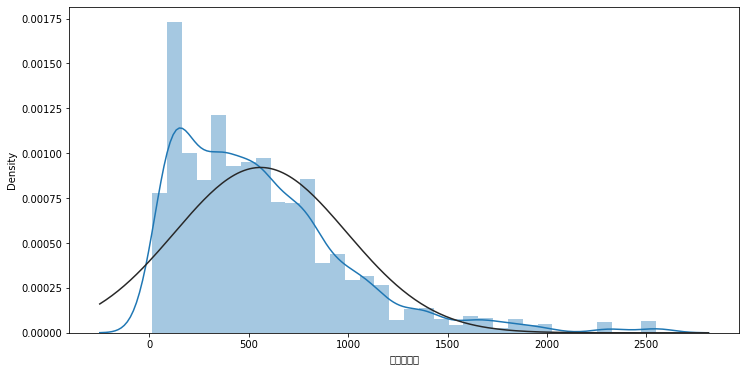

In [61]:
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import norm
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action='ignore')

(mu, sigma) = norm.fit(train['등록차량수'])
plt.figure(figsize=(12,6))
sns.distplot(train['등록차량수'], kde=True, hist=True, fit=norm)
plt.show()

# deal with NAN

In [62]:
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       569
임대료         569
지하철         211
버스            4
단지내주차면수       0
등록차량수         0
dtype: int64

In [63]:
train.loc[train.버스.isnull()]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),70.0,80,15.0,A,46000000,456000,NaN,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),80.0,124,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),80.0,289,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),80.0,82,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0


In [64]:
train.loc[train.단지코드 == 'C1649']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),70.0,80,15.0,A,46000000,456000,NaN,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),80.0,124,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),80.0,289,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),80.0,82,15.0,A,57000000,462000,NaN,NaN,1066.0,855.0


https://m.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcView.do#detailPage?pblancId=9543
버스 4, 전철 1

In [65]:
train.loc[train.지역=='경상남도'].버스.mean(), train.loc[train.지역=='경상남도'].버스.min(), train.loc[train.지역=='경상남도'].버스.max()

(3.824657534246575, 1.0, 20.0)

In [66]:
# this code doesn't write on df
train.loc[train.단지코드 == 'C1649'].지하철.fillna(1, inplace=True)
train.loc[train.단지코드 == 'C1649'].지하철

2315   NaN
2316   NaN
2317   NaN
2318   NaN
Name: 지하철, dtype: float64

In [67]:
mask = (train.단지코드 == 'C1649')
train.loc[mask, '지하철'] = train.loc[mask, '지하철'].fillna(1)
train.loc[mask]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),70.0,80,15.0,A,46000000,456000,1.0,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),80.0,124,15.0,A,57000000,462000,1.0,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),80.0,289,15.0,A,57000000,462000,1.0,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),80.0,82,15.0,A,57000000,462000,1.0,NaN,1066.0,855.0


In [68]:
train.loc[train['단지코드'] == 'C1649', '버스']=train.loc[train['단지코드'] == 'C1649', '버스'].fillna(4)
train.loc[train['단지코드'] == 'C1649']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),70.0,80,15.0,A,46000000,456000,1.0,4.0,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),80.0,124,15.0,A,57000000,462000,1.0,4.0,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),80.0,289,15.0,A,57000000,462000,1.0,4.0,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),80.0,82,15.0,A,57000000,462000,1.0,4.0,1066.0,855.0


# 지하철 NA

In [69]:
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       569
임대료         569
지하철         207
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [70]:
train.loc[train['지하철'].isna()].단지코드.unique()

array(['C1312', 'C1874', 'C1424', 'C2100', 'C2520', 'C1616', 'C1704',
       'C2258', 'C1068', 'C1983', 'C2216', 'C2644', 'C1005', 'C1004',
       'C1875', 'C2156', 'C1175', 'C2583', 'C1350'], dtype=object)

In [71]:
train.loc[train['지하철'].isna()].지역.unique()

array(['충청남도', '대전광역시'], dtype=object)

In [72]:
train.loc[train['단지코드']=='C1312']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
94,C1312,518,아파트,충청남도,국민임대,35.0,60,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
95,C1312,518,아파트,충청남도,국민임대,35.0,89,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,40.0,225,12.0,A,19954000,130940,NaN,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,45.0,143,12.0,A,28687000,149660,NaN,3.0,527.0,359.0


https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=458#

버스 3 지하철 0

In [73]:
train.loc[train['단지코드']=='C1312', '지하철'] = train.loc[train['단지코드']=='C1312', '지하철'].fillna(0)
train.loc[train['단지코드']=='C1312']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
94,C1312,518,아파트,충청남도,국민임대,35.0,60,12.0,A,17460000,122210,0.0,3.0,527.0,359.0
95,C1312,518,아파트,충청남도,국민임대,35.0,89,12.0,A,17460000,122210,0.0,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,40.0,225,12.0,A,19954000,130940,0.0,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,45.0,143,12.0,A,28687000,149660,0.0,3.0,527.0,359.0


In [74]:
train.loc[train['지하철'].isna()].단지코드.unique()

array(['C1874', 'C1424', 'C2100', 'C2520', 'C1616', 'C1704', 'C2258',
       'C1068', 'C1983', 'C2216', 'C2644', 'C1005', 'C1004', 'C1875',
       'C2156', 'C1175', 'C2583', 'C1350'], dtype=object)

In [75]:
train.loc[train['지하철'].isna()][['단지코드','지역']].values.ravel()

array(['C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도',
       'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도',
       'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도',
       'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도',
       'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도',
       'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도',
       'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도', 'C1874', '충청남도',
       'C1874', '충청남도', 'C1874', '충청남도', 'C1424', '대전광역시', 'C1424',
       '대전광역시', 'C1424', '대전광역시', 'C2100', '대전광역시', 'C2100', '대전광역시',
       'C2100', '대전광역시', 'C2100', '대전광역시', 'C2100', '대전광역시', 'C2100',
       '대전광역시', 'C2520', '대전광역시', 'C1616', '대전광역시', 'C1616', '대전광역시',
       'C1616', '대전광역시', 'C1616', '대전광역시', 'C1616', '대전광역시', 'C1616',
       '대전광역시', 'C1616', '대전광역시', 'C1616', '대전광역시', 'C1616', '대전광역시',
       'C1616', '대전광역시', 'C1616', '대전광역시', 'C1616', '대전광역

In [76]:
train.loc[train['단지코드'] == 'C1874']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
98,C1874,619,아파트,충청남도,영구임대,25.0,294,2.0,C,3141000,69900,NaN,2.0,97.0,62.0
99,C1874,619,아파트,충청남도,영구임대,25.0,149,2.0,C,3141000,69900,NaN,2.0,97.0,62.0
100,C1874,619,아파트,충청남도,영구임대,30.0,149,2.0,C,3731000,83020,NaN,2.0,97.0,62.0
101,C1874,619,상가,충청남도,임대상가,15.0,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,15.0,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
103,C1874,619,상가,충청남도,임대상가,15.0,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
104,C1874,619,상가,충청남도,임대상가,20.0,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
105,C1874,619,상가,충청남도,임대상가,20.0,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
106,C1874,619,상가,충청남도,임대상가,20.0,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
107,C1874,619,상가,충청남도,임대상가,20.0,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0


couldn't find location. set subway = 0, 임대보증금 / 월세 = 충남 + 상가 + 사이즈 + mean?

In [77]:
train.loc[train['단지코드']=='C1874', '지하철'] = train.loc[train['단지코드']=='C1874', '지하철'].fillna(0)
train.loc[train['단지코드']=='C1874'].head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
98,C1874,619,아파트,충청남도,영구임대,25.0,294,2.0,C,3141000,69900,0.0,2.0,97.0,62.0
99,C1874,619,아파트,충청남도,영구임대,25.0,149,2.0,C,3141000,69900,0.0,2.0,97.0,62.0
100,C1874,619,아파트,충청남도,영구임대,30.0,149,2.0,C,3731000,83020,0.0,2.0,97.0,62.0
101,C1874,619,상가,충청남도,임대상가,15.0,1,2.0,D,NaN,NaN,0.0,2.0,97.0,62.0
102,C1874,619,상가,충청남도,임대상가,15.0,1,2.0,D,NaN,NaN,0.0,2.0,97.0,62.0


In [78]:
train.loc[train['단지코드']=='C1875']

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
783,C1875,1003,아파트,충청남도,영구임대,25.0,596,5.0,C,3141000,69900,NaN,8.0,192.0,209.0
784,C1875,1003,아파트,충청남도,영구임대,25.0,239,5.0,C,3141000,69900,NaN,8.0,192.0,209.0
785,C1875,1003,아파트,충청남도,영구임대,30.0,149,5.0,C,3731000,83020,NaN,8.0,192.0,209.0
786,C1875,1003,상가,충청남도,임대상가,15.0,1,5.0,D,NaN,NaN,NaN,8.0,192.0,209.0
787,C1875,1003,상가,충청남도,임대상가,15.0,1,5.0,D,NaN,NaN,NaN,8.0,192.0,209.0
788,C1875,1003,상가,충청남도,임대상가,15.0,1,5.0,D,NaN,NaN,NaN,8.0,192.0,209.0
789,C1875,1003,상가,충청남도,임대상가,20.0,1,5.0,D,NaN,NaN,NaN,8.0,192.0,209.0
790,C1875,1003,상가,충청남도,임대상가,20.0,1,5.0,D,NaN,NaN,NaN,8.0,192.0,209.0
791,C1875,1003,상가,충청남도,임대상가,20.0,1,5.0,D,NaN,NaN,NaN,8.0,192.0,209.0
792,C1875,1003,상가,충청남도,임대상가,20.0,1,5.0,D,NaN,NaN,NaN,8.0,192.0,209.0


https://www.myhome.go.kr/hws/portal/gis/portalMap.do?mode=rthous&jsonStr={%22rn%22:7,%22hsmpSn%22:30700103,%22rtsSe%22:%2201%22,%22rtsInsttId%22:%22D168001%22,%22detailSn%22:%22Off%22,%22rthousSe%22:%22C%22,%22rnAdres%22:%22%EC%B6%A9%EC%B2%AD%EB%82%A8%EB%8F%84%20%EC%95%84%EC%82%B0%EC%8B%9C%20%EC%99%B8%EC%95%94%EB%A1%9C%201420%22,%22houseTy%22:%2211%22,%22houseTyNm%22:%22%EC%95%84%ED%8C%8C%ED%8A%B8%22,%22hsmpNm%22:%22%EC%9D%8D%EB%82%B4%EB%8F%99%20%EC%A3%BC%EA%B3%B5%EC%95%84%ED%8C%8C%ED%8A%B8%22,%22pnu%22:%224420011000102060000%22,%22hshldCo%22:1223,%22rnNm%22:%22%EC%99%B8%EC%95%94%EB%A1%9C1420%22,%22atchFileId%22:%22FLE00005100%22,%22suplyTy%22:%2201%22,%22suplyTyNm%22:%22%EC%98%81%EA%B5%AC%EC%9E%84%EB%8C%80%22,%22insttDc%22:%22LH%EB%8C%80%EC%A0%84%EC%B6%A9%EB%82%A8%22,%22url%22:%22http://www.lh.or.kr%22,%22invntryAssetsAt%22:%22Y%22,%22x%22:%22127.01519978722%22,%22y%22:%2236.7623630958006%22}#

지하철 0

In [79]:
train.loc[train['단지코드']=='C1875', '지하철'] = train.loc[train['단지코드']=='C1875', '지하철'].fillna(0)
train.loc[train['단지코드']=='C1875'].head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
783,C1875,1003,아파트,충청남도,영구임대,25.0,596,5.0,C,3141000,69900,0.0,8.0,192.0,209.0
784,C1875,1003,아파트,충청남도,영구임대,25.0,239,5.0,C,3141000,69900,0.0,8.0,192.0,209.0
785,C1875,1003,아파트,충청남도,영구임대,30.0,149,5.0,C,3731000,83020,0.0,8.0,192.0,209.0
786,C1875,1003,상가,충청남도,임대상가,15.0,1,5.0,D,NaN,NaN,0.0,8.0,192.0,209.0
787,C1875,1003,상가,충청남도,임대상가,15.0,1,5.0,D,NaN,NaN,0.0,8.0,192.0,209.0


In [80]:
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       569
임대료         569
지하철         151
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [81]:
train.loc[train['지하철'].isna()].단지코드.unique()

array(['C1424', 'C2100', 'C2520', 'C1616', 'C1704', 'C2258', 'C1068',
       'C1983', 'C2216', 'C2644', 'C1005', 'C1004', 'C2156', 'C1175',
       'C2583', 'C1350'], dtype=object)

In [82]:
train.loc[train['지하철'].isna()].지역.unique()

array(['대전광역시', '충청남도'], dtype=object)

In [83]:
train.loc[train['지하철'].isna()].groupby('지역').count()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
지역,,,,,,,,,,,,,,
대전광역시,93,93,93,93,93,93,93,93,35,35,0,93,93,93
충청남도,58,58,58,58,58,58,58,58,28,28,0,58,58,58


In [84]:
'''
'C1068', '충청남도'
'C1983', '충청남도'
'C2216', '충청남도'
'C2644', '충청남도'
'C1005', '충청남도'
'C1004', '충청남도'
'C2156', '충청남도',
'C1175', '충청남도',
'''

"\n'C1068', '충청남도'\n'C1983', '충청남도'\n'C2216', '충청남도'\n'C2644', '충청남도'\n'C1005', '충청남도'\n'C1004', '충청남도'\n'C2156', '충청남도',\n'C1175', '충청남도',\n"

In [85]:
train.loc[train['단지코드']=='C1068']
train.loc[train['단지코드']=='C1068', '지하철'] = train.loc[train['단지코드']=='C1068', '지하철'].fillna(0)

In [86]:
train.loc[train['단지코드']=='C1983']
train.loc[train['단지코드']=='C1983', '지하철'] = train.loc[train['단지코드']=='C1983', '지하철'].fillna(0)

In [87]:
train.loc[train['단지코드']=='C2216']
train.loc[train['단지코드']=='C2216', '지하철'] = train.loc[train['단지코드']=='C2216', '지하철'].fillna(0)

In [88]:
train.loc[train['단지코드']=='C2644']
train.loc[train['단지코드']=='C2644', '지하철'] = train.loc[train['단지코드']=='C2644', '지하철'].fillna(0)

In [89]:
train.loc[train['단지코드']=='C1005']
train.loc[train['단지코드']=='C1005', '지하철'] = train.loc[train['단지코드']=='C1005', '지하철'].fillna(0)
# https://www.kohom.or.kr/moffice/1112002/MM002003.do?mode=view&schCon=0&schStr=&page=1&p_idx=8375

In [90]:
train.loc[train['단지코드']=='C1004']
train.loc[train['단지코드']=='C1004', '지하철'] = train.loc[train['단지코드']=='C1004', '지하철'].fillna(0)
# https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=8653

In [91]:
train.loc[train['단지코드']=='C2156']
train.loc[train['단지코드']=='C2156', '지하철'] = train.loc[train['단지코드']=='C2156', '지하철'].fillna(0)

In [92]:
train.loc[train['단지코드']=='C1175']
train.loc[train['단지코드']=='C1175', '지하철'] = train.loc[train['단지코드']=='C1175', '지하철'].fillna(0)

In [93]:
train.loc[(train['지역']=='대전광역시') & train['지하철'].isna()].단지코드.unique()

array(['C1424', 'C2100', 'C2520', 'C1616', 'C1704', 'C2258', 'C2583',
       'C1350'], dtype=object)

In [94]:
train.query('지역 == "대전광역시"').지하철.value_counts()

1.0    125
0.0     48
Name: 지하철, dtype: int64

In [95]:
train.query('지역 == "대전광역시"').버스.value_counts()

2.0     67
4.0     61
10.0    39
3.0     25
5.0     22
7.0     20
6.0     17
1.0     11
12.0     4
Name: 버스, dtype: int64

대전은 지하철이 있다!

In [96]:
train.loc[train['단지코드']=='C1424']
train.loc[train['단지코드']=='C1424', '지하철'] = train.loc[train['단지코드']=='C1424', '지하철'].fillna(0)

In [97]:
train.loc[train['단지코드']=='C2100']
train.loc[train['단지코드']=='C2100', '지하철'] = train.loc[train['단지코드']=='C2100', '지하철'].fillna(0)
# https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=2245

In [98]:
train.loc[train['단지코드']=='C2520']
train.loc[train['단지코드']=='C2520', '지하철'] = train.loc[train['단지코드']=='C2520', '지하철'].fillna(0)

In [99]:
train.loc[train['단지코드']=='C1616']
train.loc[train['단지코드']=='C1616', '지하철'] = train.loc[train['단지코드']=='C1616', '지하철'].fillna(1)
# https://www.kohom.or.kr/branch/345000/BM005.do?mode=view&schCon=0&schStr=&page=1&p_idx=9391

In [100]:
train.loc[train['단지코드']=='C1704']
train.loc[train['단지코드']=='C1704', '지하철'] = train.loc[train['단지코드']=='C1704', '지하철'].fillna(0)
# https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=7726

In [101]:
train.loc[train['단지코드']=='C2258']
train.loc[train['단지코드']=='C2258', '지하철'] = train.loc[train['단지코드']=='C2258', '지하철'].fillna(0)
# https://www.kohom.or.kr/branch/345000/BM005.do?mode=view&p_idx=9678

In [102]:
train.loc[train['단지코드']=='C2583']
train.loc[train['단지코드']=='C2583', '지하철'] = train.loc[train['단지코드']=='C2583', '지하철'].fillna(0)
# https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=6268

In [103]:
train.loc[train['단지코드']=='C1350']
train.loc[train['단지코드']=='C1350', '지하철'] = train.loc[train['단지코드']=='C1350', '지하철'].fillna(1)
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=aptsale9359&logNo=220018201076

### Test fill

In [104]:
test.loc[(test['지역']=='대전광역시') & test['지하철'].isna()].단지코드.unique()

array(['C1083', 'C1327'], dtype=object)

In [105]:
test.loc[test['단지코드']=='C1083']
test.loc[test['단지코드']=='C1083', '지하철'] = test.loc[test['단지코드']=='C1083', '지하철'].fillna(1)
# https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=5110

In [106]:
test.loc[test['단지코드']=='C1327']
test.loc[test['단지코드']=='C1327', '지하철'] = test.loc[test['단지코드']=='C1327', '지하철'].fillna(1)
# https://m.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcView.do#detailPage?pblancId=3642&houseSn=1

In [107]:
test.loc[(test['지역']=='충청남도') & test['지하철'].isna()].단지코드.unique()

array(['C1472', 'C2177', 'C1318'], dtype=object)

In [108]:
test.loc[test['단지코드']=='C1472']
test.loc[test['단지코드']=='C1472', '지하철'] = test.loc[test['단지코드']=='C1472', '지하철'].fillna(0)
# https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=9683

In [109]:
test.loc[test['단지코드']=='C2177']
test.loc[test['단지코드']=='C2177', '지하철'] = test.loc[test['단지코드']=='C2177', '지하철'].fillna(0)

In [110]:
test.loc[test['단지코드']=='C1318']
test.loc[test['단지코드']=='C1318', '지하철'] = test.loc[test['단지코드']=='C1318', '지하철'].fillna(1)
# https://www.myhome.go.kr/hws/portal/sch/selectRsdtRcritNtcDetailView.do?pblancId=7095

In [111]:
test.loc[test['지하철'].isna()].단지코드.unique()

array([], dtype=object)

In [112]:
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       569
임대료         569
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

---
# 상가 임대보증금 & 임대료 fill


In [113]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2952 non-null   object 
 1   총세대수      2952 non-null   int64  
 2   임대건물구분    2952 non-null   object 
 3   지역        2952 non-null   object 
 4   공급유형      2952 non-null   object 
 5   전용면적      2952 non-null   float64
 6   전용면적별세대수  2952 non-null   int64  
 7   공가수       2952 non-null   float64
 8   신분        2952 non-null   object 
 9   임대보증금     2383 non-null   object 
 10  임대료       2383 non-null   object 
 11  지하철       2952 non-null   float64
 12  버스        2952 non-null   float64
 13  단지내주차면수   2952 non-null   float64
 14  등록차량수     2952 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 346.1+ KB


In [114]:
# train['임대보증금'] = train['임대보증금'].astype(float)
# train['임대료'] = train['임대료'].astype(float)
# train.info()

In [115]:
train.loc[train['임대보증금'] == "-", '임대보증금'] = train.loc[train['임대보증금'] == "-", '임대보증금'].replace("-", np.NaN)
train.loc[train['임대료'] == "-", '임대료'] = train.loc[train['임대료'] == "-", '임대료'].replace("-", np.NaN)

In [116]:
train.query('(임대료 == "-") | (임대보증금 == "-")')

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수


In [117]:
train['임대보증금'] = train['임대보증금'].astype(float)
train['임대료'] = train['임대료'].astype(float)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2952 non-null   object 
 1   총세대수      2952 non-null   int64  
 2   임대건물구분    2952 non-null   object 
 3   지역        2952 non-null   object 
 4   공급유형      2952 non-null   object 
 5   전용면적      2952 non-null   float64
 6   전용면적별세대수  2952 non-null   int64  
 7   공가수       2952 non-null   float64
 8   신분        2952 non-null   object 
 9   임대보증금     2371 non-null   float64
 10  임대료       2362 non-null   float64
 11  지하철       2952 non-null   float64
 12  버스        2952 non-null   float64
 13  단지내주차면수   2952 non-null   float64
 14  등록차량수     2952 non-null   float64
dtypes: float64(8), int64(2), object(5)
memory usage: 346.1+ KB


In [118]:
temp = train.loc[(train['임대건물구분']=='상가')].groupby('전용면적')['임대보증금', '임대료']
# (train['지역']=='충청남도') &
# temp = temp.fillna(temp.mean())
temp.describe()

임대보증금                                임대료                             
      count mean std min 25% 50% 75% max count mean std min 25% 50% 75% max
전용면적                                                                       
15.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
20.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
25.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
30.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
35.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
40.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
45.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
50.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
55.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
60.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
70.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
75.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
80.0    0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN
100.0   0.0  NaN NaN NaN NaN NaN NaN NaN   0.0  NaN NaN NaN NaN NaN NaN NaN

In [119]:
train.loc[(train['임대건물구분']=='상가')].describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
count,562.000000,562.000000,562.0,562.000000,0.0,0.0,562.000000,562.000000,562.000000,562.000000
mean,1247.375445,33.612100,1.0,7.528470,NaN,NaN,0.336299,3.640569,267.797153,158.393238
std,655.065475,18.825469,0.0,10.096685,NaN,NaN,0.472863,2.326854,177.893040,105.061429
min,410.000000,15.000000,1.0,0.000000,NaN,NaN,0.000000,1.000000,65.000000,31.000000
25%,657.000000,25.000000,1.0,1.000000,NaN,NaN,0.000000,2.000000,153.000000,94.000000
50%,1005.000000,30.000000,1.0,2.000000,NaN,NaN,0.000000,3.000000,200.000000,122.500000
75%,1755.000000,35.000000,1.0,7.000000,NaN,NaN,1.000000,4.000000,351.000000,175.750000
max,2428.000000,100.000000,1.0,34.000000,NaN,NaN,1.000000,12.000000,756.000000,649.000000


In [120]:
test.loc[(test['임대건물구분']=='상가')]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수
80,C1006,1505,상가,대전광역시,임대상가,35.0,1,27.0,D,NaN,NaN,2.0,5.0,428.0
81,C1006,1505,상가,대전광역시,임대상가,35.0,1,27.0,D,NaN,NaN,2.0,5.0,428.0
82,C1006,1505,상가,대전광역시,임대상가,35.0,1,27.0,D,NaN,NaN,2.0,5.0,428.0
83,C1006,1505,상가,대전광역시,임대상가,35.0,1,27.0,D,NaN,NaN,2.0,5.0,428.0
84,C1006,1505,상가,대전광역시,임대상가,35.0,1,27.0,D,NaN,NaN,2.0,5.0,428.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,30.0,1,0.0,D,NaN,NaN,0.0,5.0,131.0
329,C1729,627,상가,강원도,임대상가,30.0,1,0.0,D,NaN,NaN,0.0,5.0,131.0
330,C1729,627,상가,강원도,임대상가,35.0,1,0.0,D,NaN,NaN,0.0,5.0,131.0
331,C1729,627,상가,강원도,임대상가,50.0,1,0.0,D,NaN,NaN,0.0,5.0,131.0


In [121]:
train[['임대보증금', '임대료']].loc[train['지역']=='충청남도'].groupby(train['전용면적']).mean()

,임대보증금,임대료
전용면적,,
15.0,NaN,NaN
20.0,3.198020e+07,16650.000000
25.0,9.219846e+06,87470.000000
30.0,1.349290e+07,82017.500000
35.0,1.093619e+07,117636.153846
40.0,1.663867e+07,126866.666667
45.0,2.750587e+07,126276.470588
50.0,3.159283e+07,142650.714286
55.0,2.875825e+07,201560.000000


array([<AxesSubplot:xlabel='전용면적'>, <AxesSubplot:xlabel='전용면적'>],
      dtype=object)

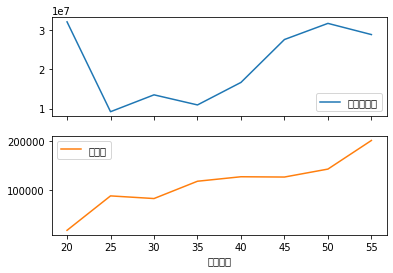

In [122]:
train[['임대보증금', '임대료']].loc[train['지역']=='충청남도'].groupby(train['전용면적']).mean().plot(subplots=True)

In [123]:
train.query('임대보증금 != 임대보증금').groupby(['지역']).count().index

Index(['강원도', '경상남도', '대구광역시', '대전광역시', '부산광역시', '제주특별자치도', '충청남도'], dtype='object', name='지역')

In [126]:
temp_region = train.query('임대보증금 != 임대보증금').groupby(['지역']).count().index

for region in temp_region:
    train_temp = train.loc[train['지역']==region].groupby('전용면적').mean()
    # get per sqm average 임대보증금
    per_m_avg_list = []
    for i in range(len(train_temp.index)):
        per_m_avg_list.append(train_temp.iloc[i,3]/train_temp.index[i])
    per_m_avg = np.nanmean(per_m_avg_list)
    # 임대보증금
    tmp_i = train_temp.index
    for i in tmp_i:
        train.loc[(train['지역']==region) & (train['전용면적']==i),'임대보증금'] = \
            train.loc[(train['지역']==region) & (train['전용면적']==i),'임대보증금'].fillna(per_m_avg * i)

    # get per sqm average 임대료
    per_m_avg_list = []
    for i in range(len(train_temp.index)):
        per_m_avg_list.append(train_temp.iloc[i,4]/train_temp.index[i])
    per_m_avg = np.nanmean(per_m_avg_list)
    # 임대료
    tmp_i = train_temp.index
    for i in tmp_i:
        train.loc[(train['지역']==region) & (train['전용면적']==i),'임대료'] = \
            train.loc[(train['지역']==region) & (train['전용면적']==i),'임대료'].fillna(per_m_avg * i)

In [127]:
train.query('임대보증금 != 임대보증금').groupby(['지역']).count().index

Index([], dtype='object', name='지역')

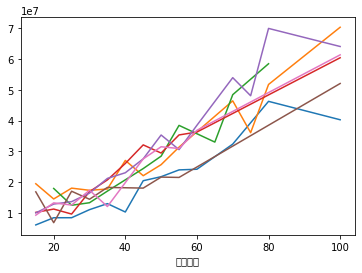

In [135]:
for region in temp_region:
    train.loc[train['지역']==region].groupby('전용면적').임대보증금.mean().plot()

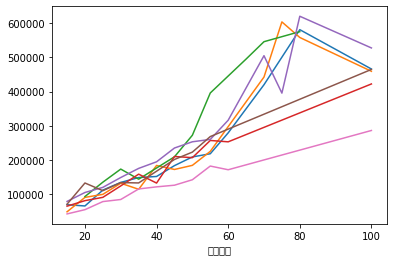

In [136]:
for region in temp_region:
    train.loc[train['지역']==region].groupby('전용면적').임대료.mean().plot()

In [137]:
test.loc[test['임대보증금'] == "-", '임대보증금'] = test.loc[test['임대보증금'] == "-", '임대보증금'].replace("-", np.NaN)
test.loc[test['임대료'] == "-", '임대료'] = test.loc[test['임대료'] == "-", '임대료'].replace("-", np.NaN)

test['임대보증금'] = test['임대보증금'].astype(float)
test['임대료'] = test['임대료'].astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      1022 non-null   object 
 1   총세대수      1022 non-null   int64  
 2   임대건물구분    1022 non-null   object 
 3   지역        1022 non-null   object 
 4   공급유형      1022 non-null   object 
 5   전용면적      1022 non-null   float64
 6   전용면적별세대수  1022 non-null   int64  
 7   공가수       1022 non-null   float64
 8   신분        1020 non-null   object 
 9   임대보증금     836 non-null    float64
 10  임대료       836 non-null    float64
 11  지하철       1022 non-null   float64
 12  버스        1022 non-null   float64
 13  단지내주차면수   1022 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 111.9+ KB


In [138]:
test.query('임대보증금 != 임대보증금').groupby(['지역']).count().index

Index(['강원도', '경상남도', '대전광역시', '부산광역시', '울산광역시', '충청남도'], dtype='object', name='지역')

In [139]:
temp_region = test.query('임대보증금 != 임대보증금').groupby(['지역']).count().index

for region in temp_region:
    test_temp = test.loc[test['지역']==region].groupby('전용면적').mean()
    # get per sqm average 임대보증금
    per_m_avg_list = []
    for i in range(len(test_temp.index)):
        per_m_avg_list.append(test_temp.iloc[i,3]/test_temp.index[i])
    per_m_avg = np.nanmean(per_m_avg_list)
    # 임대보증금
    tmp_i = test_temp.index
    for i in tmp_i:
        test.loc[(test['지역']==region) & (test['전용면적']==i),'임대보증금'] = \
            test.loc[(test['지역']==region) & (test['전용면적']==i),'임대보증금'].fillna(per_m_avg * i)

    # get per sqm average 임대료
    per_m_avg_list = []
    for i in range(len(test_temp.index)):
        per_m_avg_list.append(test_temp.iloc[i,4]/test_temp.index[i])
    per_m_avg = np.nanmean(per_m_avg_list)
    # 임대료
    tmp_i = test_temp.index
    for i in tmp_i:
        test.loc[(test['지역']==region) & (test['전용면적']==i),'임대료'] = \
            test.loc[(test['지역']==region) & (test['전용면적']==i),'임대료'].fillna(per_m_avg * i)

In [140]:
test.query('임대보증금 != 임대보증금').groupby(['지역']).count().index

Index([], dtype='object', name='지역')

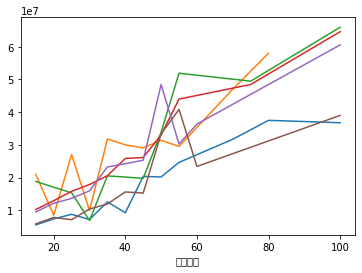

In [141]:
for region in temp_region:
    test.loc[test['지역']==region].groupby('전용면적').임대보증금.mean().plot()

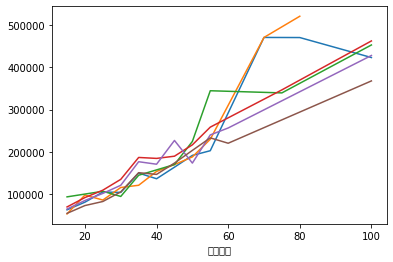

In [142]:
for region in temp_region:
    test.loc[test['지역']==region].groupby('전용면적').임대료.mean().plot()

In [145]:
test.loc[test['신분'].isna()]
# test.isna().sum()
# 2253 = C, 2411 = A

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수
196,C2411,962,아파트,경상남도,국민임대,45.0,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
258,C2253,1161,아파트,강원도,영구임대,25.0,745,0.0,NaN,2249000.0,44770.0,0.0,2.0,173.0


In [149]:
test.query('단지코드 == "C2411"')

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수
193,C2411,962,아파트,경상남도,국민임대,35.0,56,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
194,C2411,962,아파트,경상남도,국민임대,35.0,336,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
195,C2411,962,아파트,경상남도,국민임대,35.0,179,25.0,A,11992000.0,100720.0,0.0,2.0,840.0
196,C2411,962,아파트,경상남도,국민임대,45.0,240,25.0,NaN,71950000.0,37470.0,0.0,2.0,840.0
197,C2411,962,아파트,경상남도,국민임대,50.0,150,25.0,A,21586000.0,171480.0,0.0,2.0,840.0


In [154]:
test.loc[(test['단지코드']=='C2253') & test['신분'].isna(), '신분'] = test.loc[(test['단지코드']=='C2253') & test['신분'].isna(), '신분'].fillna('C')
test.loc[(test['단지코드']=='C2411') & test['신분'].isna(), '신분'] = test.loc[(test['단지코드']=='C2411') & test['신분'].isna(), '신분'].fillna('A')
# 2253 = C, 2411 = A

In [155]:
test.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
신분          0
임대보증금       0
임대료         0
지하철         0
버스          0
단지내주차면수     0
dtype: int64

In [156]:
train.to_csv('train_filled.csv')
test.to_csv('test_filled.csv')

---

In [115]:
train.groupby(['지역', '전용면적'])['임대보증금','임대료'].mean()
temp = train.copy()

In [116]:
temp['임대보증금'] = temp['임대보증금'].fillna(temp.groupby(['지역', '전용면적'])['임대보증금'].transform('mean'))

In [117]:
temp['임대료'] = temp['임대료'].fillna(temp.groupby(['지역', '전용면적'])['임대료'].transform('mean'))

In [118]:
temp.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       105
임대료         105
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [119]:
temp.query('임대보증금 != 임대보증금'), temp.query('임대료 != 임대료')

(       단지코드  총세대수 임대건물구분     지역  공급유형   전용면적  전용면적별세대수   공가수 신분  임대보증금  임대료  \
 101   C1874   619     상가   충청남도  임대상가   15.0         1   2.0  D    NaN  NaN   
 102   C1874   619     상가   충청남도  임대상가   15.0         1   2.0  D    NaN  NaN   
 103   C1874   619     상가   충청남도  임대상가   15.0         1   2.0  D    NaN  NaN   
 140   C2416   560     상가   경상남도  임대상가  100.0         1   0.0  D    NaN  NaN   
 169   C2621  1396     상가  대전광역시  임대상가   60.0         1  26.0  D    NaN  NaN   
 ...     ...   ...    ...    ...   ...    ...       ...   ... ..    ...  ...   
 2336  C1350  1401    아파트  대전광역시  공공분양   80.0        26   2.0  D    NaN  NaN   
 2337  C1350  1401    아파트  대전광역시  공공분양   80.0        26   2.0  D    NaN  NaN   
 2547  C1326  1934    아파트  부산광역시  국민임대   20.0       472  43.0  H    NaN  NaN   
 2548  C1326  1934    아파트  부산광역시  국민임대   20.0       104  43.0  H    NaN  NaN   
 2680  C1786   480    아파트    강원도  행복주택   15.0       156  25.0  K    NaN  NaN   
 
       지하철   버스  단지내주차면수   등록차량수  
 10

now apply to train df

In [120]:
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       581
임대료         590
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [121]:
train['임대보증금'] = train['임대보증금'].fillna(train.groupby(['지역', '전용면적'])['임대보증금'].transform('mean'))
train['임대료'] = train['임대료'].fillna(train.groupby(['지역', '전용면적'])['임대료'].transform('mean'))
train.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       105
임대료         105
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

back to temp_train, work with rest of 임대nulls

In [122]:
temp = train.copy()

In [123]:
temp.isna().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
신분            0
임대보증금       105
임대료         105
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [124]:
temp.query('임대보증금 != 임대보증금').groupby(['지역','전용면적']).count()

단지코드  총세대수  임대건물구분  공급유형  전용면적별세대수  공가수  신분  임대보증금  임대료  지하철  \
지역      전용면적                                                                  
강원도     15.0      1     1       1     1         1    1   1      0    0    1   
        60.0      5     5       5     5         5    5   5      0    0    5   
        100.0     2     2       2     2         2    2   2      0    0    2   
경상남도    100.0     4     4       4     4         4    4   4      0    0    4   
대전광역시   60.0      1     1       1     1         1    1   1      0    0    1   
        70.0      3     3       3     3         3    3   3      0    0    3   
        75.0      2     2       2     2         2    2   2      0    0    2   
        80.0      4     4       4     4         4    4   4      0    0    4   
        100.0     8     8       8     8         8    8   8      0    0    8   
부산광역시   20.0     47    47      47    47        47   47  47      0    0   47   
        60.0      1     1       1     1         1    1   1      0    0    1   
        75.0      3     3       3     3         3    3   3      0    0    3   
        100.0    10    10      10    10        10   10  10      0    0   10   
제주특별자치도 100.0     1     1       1     1         1    1   1      0    0    1   
충청남도    15.0      9     9       9     9         9    9   9      0    0    9   
        60.0      1     1       1     1         1    1   1      0    0    1   
        100.0     3     3       3     3         3    3   3      0    0    3   

               버스  단지내주차면수  등록차량수  
지역      전용면적                       
강원도     15.0    1        1      1  
        60.0    5        5      5  
        100.0   2        2      2  
경상남도    100.0   4        4      4  
대전광역시   60.0    1        1      1  
        70.0    3        3      3  
        75.0    2        2      2  
        80.0    4        4      4  
        100.0   8        8      8  
부산광역시   20.0   47       47     47  
        60.0    1        1      1  
        75.0    3        3      3  
        100.0  10       10     10  
제주특별자치도 100.0   1        1      1  
충청남도    15.0    9        9      9  
        60.0    1        1      1  
        100.0   3        3      3

In [125]:
temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[:3,3].mean()

12985733.333333336

In [126]:
temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[:3,3:5].mean()

임대보증금    1.298573e+07
임대료      9.040833e+04
dtype: float64

In [127]:
temp.loc[(temp['지역']=='부산광역시') & (temp['전용면적']==20),'임대보증금'] = \
    temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[:3,3].mean()

In [128]:
temp.loc[(temp['지역']=='부산광역시') & (temp['전용면적']==20),'임대료'] = \
    temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[:3,4].mean()

In [129]:
# temp.query('(지역=="부산광역시") & (전용면적==20)')['임대보증금'] = \
#     temp.query('(지역=="부산광역시") & (전용면적==20)')['임대보증금'].fillna(
#     temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[:3,4].mean()
#     )

In [130]:
# temp.query('(지역=="부산광역시") & (전용면적==20)')['임대료'] = \
#     temp.query('(지역=="부산광역시") & (전용면적==20)')['임대료'].fillna(
#     temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[:3,5].mean()
#     )

In [131]:
temp.query('지역=="부산광역시"').groupby('전용면적').mean()

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
15.0,1622.040000,1.760000,16.520000,1.800000e+07,87000.000000,0.680000,2.440000,360.160000,183.720000
20.0,1667.893617,13.212766,13.978723,1.298573e+07,90408.333333,0.723404,2.510638,413.255319,240.659574
25.0,1497.800000,197.660000,15.440000,7.971467e+06,93816.666667,0.440000,2.280000,331.000000,200.140000
30.0,1723.782609,88.282609,10.478261,8.380667e+06,123800.000000,0.760870,2.478261,405.608696,228.500000
35.0,1648.677966,62.644068,7.593220,1.780150e+07,152330.000000,0.169492,2.542373,493.423729,359.711864
40.0,1219.100000,45.100000,19.000000,2.039440e+07,179226.000000,0.700000,2.600000,410.200000,326.700000
45.0,810.360000,129.200000,23.200000,2.749262e+07,235268.750000,0.880000,2.960000,681.000000,499.880000
50.0,1397.527778,100.527778,11.944444,3.855733e+07,243344.444444,0.527778,2.250000,595.333333,463.083333
55.0,1110.090909,211.000000,24.909091,2.878012e+07,249321.250000,0.181818,2.363636,774.454545,570.000000


In [132]:
temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[9,:]

총세대수        1755.0
전용면적별세대수       1.0
공가수           29.0
임대보증금          NaN
임대료            NaN
지하철            1.0
버스             3.0
단지내주차면수      270.0
등록차량수        172.0
Name: 60.0, dtype: float64

In [133]:
temp.loc[(temp['지역']=='부산광역시') & (temp['전용면적']==60),'임대보증금'] = \
    temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[8:11,3].mean()
temp.loc[(temp['지역']=='부산광역시') & (temp['전용면적']==60),'임대료'] = \
    temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[8:11,4].mean()

In [134]:
temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[11,:]

총세대수        1981.000000
전용면적별세대수       1.000000
공가수            1.333333
임대보증금               NaN
임대료                 NaN
지하철            0.000000
버스             2.000000
단지내주차면수      404.333333
등록차량수        304.000000
Name: 75.0, dtype: float64

In [135]:
temp.loc[(temp['지역']=='부산광역시') & (temp['전용면적']==75),'임대보증금'] = \
    temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[10:13,3].mean()
temp.loc[(temp['지역']=='부산광역시') & (temp['전용면적']==75),'임대료'] = \
    temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[10:13,4].mean()

In [136]:
temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[8:,:]

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
55.0,1110.090909,211.00,24.909091,28780125.0,249321.250,0.181818,2.363636,774.454545,570.00
60.0,1755.000000,1.00,29.000000,42890062.5,399660.625,1.000000,3.000000,270.000000,172.00
70.0,1052.500000,189.25,20.750000,57000000.0,550000.000,0.250000,1.500000,852.000000,779.25
75.0,1981.000000,1.00,1.333333,63500000.0,585000.000,0.000000,2.000000,404.333333,304.00
80.0,908.000000,152.00,27.000000,70000000.0,620000.000,0.000000,1.000000,1001.000000,995.00
100.0,1744.500000,1.00,10.100000,NaN,NaN,0.500000,2.300000,369.300000,228.10


In [137]:
temp = train.copy()

In [138]:
temp.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,35.0,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,35.0,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,50.0,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,50.0,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,50.0,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0


In [139]:
data = pd.get_dummies(temp, columns=['전용면적','지역','임대건물구분'])
data.head().iloc[:,12:].T

,0,1,2,3,4
전용면적_15.0,0,0,0,0,0
전용면적_20.0,0,0,0,0,0
전용면적_25.0,0,0,0,0,0
전용면적_30.0,0,0,0,0,0
전용면적_35.0,1,1,0,0,0
전용면적_40.0,0,0,0,0,0
전용면적_45.0,0,0,0,0,0
전용면적_50.0,0,0,1,1,1
전용면적_55.0,0,0,0,0,0
전용면적_60.0,0,0,0,0,0


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   단지코드        2952 non-null   object 
 1   총세대수        2952 non-null   int64  
 2   공급유형        2952 non-null   object 
 3   전용면적별세대수    2952 non-null   int64  
 4   공가수         2952 non-null   float64
 5   신분          2952 non-null   object 
 6   임대보증금       2847 non-null   float64
 7   임대료         2847 non-null   float64
 8   지하철         2952 non-null   float64
 9   버스          2952 non-null   float64
 10  단지내주차면수     2952 non-null   float64
 11  등록차량수       2952 non-null   float64
 12  전용면적_15.0   2952 non-null   uint8  
 13  전용면적_20.0   2952 non-null   uint8  
 14  전용면적_25.0   2952 non-null   uint8  
 15  전용면적_30.0   2952 non-null   uint8  
 16  전용면적_35.0   2952 non-null   uint8  
 17  전용면적_40.0   2952 non-null   uint8  
 18  전용면적_45.0   2952 non-null   uint8  
 19  전용면적_50.0   2952 non-null  

In [141]:
from sklearn import linear_model
l_reg = linear_model.LinearRegression()

X = data.dropna(axis=0).iloc[:,12:]
y = data.dropna(axis=0)['임대보증금']

l_reg_model = l_reg.fit(X, y)

In [142]:
temp.loc[(temp['지역']=='부산광역시') & (temp['전용면적']==100)]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
387,C2135,1116,상가,부산광역시,임대상가,100.0,1,10.0,D,NaN,NaN,1.0,3.0,262.0,127.0
416,C2034,1486,상가,부산광역시,임대상가,100.0,1,2.0,D,NaN,NaN,1.0,3.0,405.0,132.0
438,C1109,1957,상가,부산광역시,임대상가,100.0,1,1.0,D,NaN,NaN,1.0,2.0,351.0,313.0
464,C2289,1527,상가,부산광역시,임대상가,100.0,1,2.0,D,NaN,NaN,0.0,3.0,240.0,364.0
496,C2597,1005,상가,부산광역시,임대상가,100.0,1,25.0,D,NaN,NaN,0.0,2.0,166.0,94.0
519,C2310,1988,상가,부산광역시,임대상가,100.0,1,1.0,D,NaN,NaN,0.0,2.0,217.0,189.0
567,C2132,2428,상가,부산광역시,임대상가,100.0,1,1.0,D,NaN,NaN,0.0,1.0,756.0,359.0
568,C2132,2428,상가,부산광역시,임대상가,100.0,1,1.0,D,NaN,NaN,0.0,1.0,756.0,359.0
615,C1439,1755,상가,부산광역시,임대상가,100.0,1,29.0,D,NaN,NaN,1.0,3.0,270.0,172.0
616,C1439,1755,상가,부산광역시,임대상가,100.0,1,29.0,D,NaN,NaN,1.0,3.0,270.0,172.0


In [143]:
data.iloc[387,12:]

전용면적_15.0     0
전용면적_20.0     0
전용면적_25.0     0
전용면적_30.0     0
전용면적_35.0     0
전용면적_40.0     0
전용면적_45.0     0
전용면적_50.0     0
전용면적_55.0     0
전용면적_60.0     0
전용면적_65.0     0
전용면적_70.0     0
전용면적_75.0     0
전용면적_80.0     0
전용면적_100.0    1
지역_강원도        0
지역_경기도        0
지역_경상남도       0
지역_경상북도       0
지역_광주광역시      0
지역_대구광역시      0
지역_대전광역시      0
지역_부산광역시      1
지역_서울특별시      0
지역_세종특별자치시    0
지역_울산광역시      0
지역_전라남도       0
지역_전라북도       0
지역_제주특별자치도    0
지역_충청남도       0
지역_충청북도       0
임대건물구분_상가     1
임대건물구분_아파트    0
Name: 387, dtype: object

In [144]:
y_pred = l_reg_model.predict(data.iloc[:, 12:])
y_pred.shape

(2952,)

In [145]:
temp['임대보증금'] = np.where(temp['임대보증금'].isnull(), pd.Series(y_pred.flatten()), temp['임대보증금'])

In [146]:
temp.query('지역=="부산광역시"').groupby(['지역','전용면적']).mean()

총세대수    전용면적별세대수        공가수         임대보증금            임대료  \
지역    전용면적                                                                     
부산광역시 15.0   1622.040000    1.760000  16.520000  1.800000e+07   87000.000000   
      20.0   1667.893617   13.212766  13.978723  1.497628e+07            NaN   
      25.0   1497.800000  197.660000  15.440000  7.971467e+06   93816.666667   
      30.0   1723.782609   88.282609  10.478261  8.380667e+06  123800.000000   
      35.0   1648.677966   62.644068   7.593220  1.780150e+07  152330.000000   
      40.0   1219.100000   45.100000  19.000000  2.039440e+07  179226.000000   
      45.0    810.360000  129.200000  23.200000  2.749262e+07  235268.750000   
      50.0   1397.527778  100.527778  11.944444  3.855733e+07  243344.444444   
      55.0   1110.090909  211.000000  24.909091  2.878012e+07  249321.250000   
      60.0   1755.000000    1.000000  29.000000  2.169295e+19            NaN   
      70.0   1052.500000  189.250000  20.750000  5.700000e+07  550000.000000   
      75.0   1981.000000    1.000000   1.333333  5.013504e+07            NaN   
      80.0    908.000000  152.000000  27.000000  7.000000e+07  620000.000000   
      100.0  1744.500000    1.000000  10.100000  1.396878e+19            NaN   

                  지하철        버스      단지내주차면수       등록차량수  
지역    전용면적                                                
부산광역시 15.0   0.680000  2.440000   360.160000  183.720000  
      20.0   0.723404  2.510638   413.255319  240.659574  
      25.0   0.440000  2.280000   331.000000  200.140000  
      30.0   0.760870  2.478261   405.608696  228.500000  
      35.0   0.169492  2.542373   493.423729  359.711864  
      40.0   0.700000  2.600000   410.200000  326.700000  
      45.0   0.880000  2.960000   681.000000  499.880000  
      50.0   0.527778  2.250000   595.333333  463.083333  
      55.0   0.181818  2.363636   774.454545  570.000000  
      60.0   1.000000  3.000000   270.000000  172.000000  
      70.0   0.250000  1.500000   852.000000  779.250000  
      75.0   0.000000  2.000000   404.333333  304.000000  
      80.0   0.000000  1.000000  1001.000000  995.000000  
      100.0  0.500000  2.300000   369.300000  228.100000

In [147]:
temp.query('지역=="부산광역시"').groupby(['지역','전용면적']).mean().iloc[9,3]

2.169294643007654e+19

In [148]:
from sklearn import linear_model
l_reg = linear_model.LinearRegression()

X = data.dropna(axis=0).iloc[:,12:]
y = data.dropna(axis=0)['임대료']

l_reg_model = l_reg.fit(X, y)

In [149]:
temp['임대료'] = np.where(temp['임대료'].isnull(), pd.Series(y_pred.flatten()), temp['임대료'])

In [150]:
temp.query('지역=="부산광역시"').groupby(['지역','전용면적']).mean()

총세대수    전용면적별세대수        공가수         임대보증금           임대료  \
지역    전용면적                                                                    
부산광역시 15.0   1622.040000    1.760000  16.520000  1.800000e+07  8.700000e+04   
      20.0   1667.893617   13.212766  13.978723  1.497628e+07  1.497628e+07   
      25.0   1497.800000  197.660000  15.440000  7.971467e+06  9.381667e+04   
      30.0   1723.782609   88.282609  10.478261  8.380667e+06  1.238000e+05   
      35.0   1648.677966   62.644068   7.593220  1.780150e+07  1.523300e+05   
      40.0   1219.100000   45.100000  19.000000  2.039440e+07  1.792260e+05   
      45.0    810.360000  129.200000  23.200000  2.749262e+07  2.352688e+05   
      50.0   1397.527778  100.527778  11.944444  3.855733e+07  2.433444e+05   
      55.0   1110.090909  211.000000  24.909091  2.878012e+07  2.493212e+05   
      60.0   1755.000000    1.000000  29.000000  2.169295e+19  2.169295e+19   
      70.0   1052.500000  189.250000  20.750000  5.700000e+07  5.500000e+05   
      75.0   1981.000000    1.000000   1.333333  5.013504e+07  5.013504e+07   
      80.0    908.000000  152.000000  27.000000  7.000000e+07  6.200000e+05   
      100.0  1744.500000    1.000000  10.100000  1.396878e+19  1.396878e+19   

                  지하철        버스      단지내주차면수       등록차량수  
지역    전용면적                                                
부산광역시 15.0   0.680000  2.440000   360.160000  183.720000  
      20.0   0.723404  2.510638   413.255319  240.659574  
      25.0   0.440000  2.280000   331.000000  200.140000  
      30.0   0.760870  2.478261   405.608696  228.500000  
      35.0   0.169492  2.542373   493.423729  359.711864  
      40.0   0.700000  2.600000   410.200000  326.700000  
      45.0   0.880000  2.960000   681.000000  499.880000  
      50.0   0.527778  2.250000   595.333333  463.083333  
      55.0   0.181818  2.363636   774.454545  570.000000  
      60.0   1.000000  3.000000   270.000000  172.000000  
      70.0   0.250000  1.500000   852.000000  779.250000  
      75.0   0.000000  2.000000   404.333333  304.000000  
      80.0   0.000000  1.000000  1001.000000  995.000000  
      100.0  0.500000  2.300000   369.300000  228.100000

# fillna cont..

In [151]:
temp = train.copy()

In [152]:
temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[12:,3]

전용면적
80.0     70000000.0
100.0           NaN
Name: 임대보증금, dtype: float64

In [153]:
temp.query('지역=="부산광역시"').groupby('전용면적').mean().index[12]

80.0

In [154]:
temp.loc[(temp['지역']=='부산광역시') & (temp['전용면적']==100),'임대보증금'] = \
    temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[12,3] / (temp.query('지역=="부산광역시"').groupby('전용면적').mean().index[12]/100)
temp.loc[(temp['지역']=='부산광역시') & (temp['전용면적']==100),'임대료'] = \
    temp.query('지역=="부산광역시"').groupby('전용면적').mean().iloc[12,4] / (temp.query('지역=="부산광역시"').groupby('전용면적').mean().index[12]/100)

In [155]:
temp.query('지역=="부산광역시"').groupby('전용면적').mean()

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
15.0,1622.040000,1.760000,16.520000,1.800000e+07,87000.000000,0.680000,2.440000,360.160000,183.720000
20.0,1667.893617,13.212766,13.978723,NaN,NaN,0.723404,2.510638,413.255319,240.659574
25.0,1497.800000,197.660000,15.440000,7.971467e+06,93816.666667,0.440000,2.280000,331.000000,200.140000
30.0,1723.782609,88.282609,10.478261,8.380667e+06,123800.000000,0.760870,2.478261,405.608696,228.500000
35.0,1648.677966,62.644068,7.593220,1.780150e+07,152330.000000,0.169492,2.542373,493.423729,359.711864
40.0,1219.100000,45.100000,19.000000,2.039440e+07,179226.000000,0.700000,2.600000,410.200000,326.700000
45.0,810.360000,129.200000,23.200000,2.749262e+07,235268.750000,0.880000,2.960000,681.000000,499.880000
50.0,1397.527778,100.527778,11.944444,3.855733e+07,243344.444444,0.527778,2.250000,595.333333,463.083333
55.0,1110.090909,211.000000,24.909091,2.878012e+07,249321.250000,0.181818,2.363636,774.454545,570.000000


# fill train NA

In [156]:
train_temp = train.query('지역=="부산광역시"').groupby('전용면적')
train.loc[(temp['지역']=='부산광역시') & (train['전용면적']==100),'임대보증금'] = \
    train_temp.mean().iloc[12,3] / (train_temp.mean().index[12]/100)
train.loc[(temp['지역']=='부산광역시') & (train['전용면적']==100),'임대료'] = \
    train_temp.mean().iloc[12,4] / (train_temp.mean().index[12]/100)

In [157]:
train_temp.mean().iloc[8:,:]

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
55.0,1110.090909,211.00,24.909091,28780125.0,249321.25,0.181818,2.363636,774.454545,570.00
60.0,1755.000000,1.00,29.000000,NaN,NaN,1.000000,3.000000,270.000000,172.00
70.0,1052.500000,189.25,20.750000,57000000.0,550000.00,0.250000,1.500000,852.000000,779.25
75.0,1981.000000,1.00,1.333333,NaN,NaN,0.000000,2.000000,404.333333,304.00
80.0,908.000000,152.00,27.000000,70000000.0,620000.00,0.000000,1.000000,1001.000000,995.00
100.0,1744.500000,1.00,10.100000,NaN,NaN,0.500000,2.300000,369.300000,228.10


In [158]:
train.loc[(train['지역']=='부산광역시') & (train['전용면적']==20),'임대보증금'] = \
    train_temp.mean().iloc[:3,3].mean()
train.loc[(train['지역']=='부산광역시') & (train['전용면적']==20),'임대료'] = \
    train_temp.mean().iloc[:3,4].mean()

train.loc[(train['지역']=='부산광역시') & (train['전용면적']==60),'임대보증금'] = \
    train_temp.mean().iloc[8:11,3].mean()
train.loc[(train['지역']=='부산광역시') & (train['전용면적']==60),'임대료'] = \
    train_temp.mean().iloc[8:11,4].mean()

train.loc[(train['지역']=='부산광역시') & (train['전용면적']==75),'임대보증금'] = \
    train_temp.mean().iloc[10:13,3].mean()
train.loc[(train['지역']=='부산광역시') & (train['전용면적']==75),'임대료'] = \
    train_temp.mean().iloc[10:13,4].mean()

In [159]:
train.query('지역=="부산광역시"').groupby('전용면적').mean()

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
15.0,1622.040000,1.760000,16.520000,1.800000e+07,87000.000000,0.680000,2.440000,360.160000,183.720000
20.0,1667.893617,13.212766,13.978723,1.298573e+07,90408.333333,0.723404,2.510638,413.255319,240.659574
25.0,1497.800000,197.660000,15.440000,7.971467e+06,93816.666667,0.440000,2.280000,331.000000,200.140000
30.0,1723.782609,88.282609,10.478261,8.380667e+06,123800.000000,0.760870,2.478261,405.608696,228.500000
35.0,1648.677966,62.644068,7.593220,1.780150e+07,152330.000000,0.169492,2.542373,493.423729,359.711864
40.0,1219.100000,45.100000,19.000000,2.039440e+07,179226.000000,0.700000,2.600000,410.200000,326.700000
45.0,810.360000,129.200000,23.200000,2.749262e+07,235268.750000,0.880000,2.960000,681.000000,499.880000
50.0,1397.527778,100.527778,11.944444,3.855733e+07,243344.444444,0.527778,2.250000,595.333333,463.083333
55.0,1110.090909,211.000000,24.909091,2.878012e+07,249321.250000,0.181818,2.363636,774.454545,570.000000


In [160]:
train.query('임대보증금 != 임대보증금').groupby(['지역','전용면적']).count()

단지코드  총세대수  임대건물구분  공급유형  전용면적별세대수  공가수  신분  임대보증금  임대료  지하철  \
지역      전용면적                                                                  
강원도     15.0      1     1       1     1         1    1   1      0    0    1   
        60.0      5     5       5     5         5    5   5      0    0    5   
        100.0     2     2       2     2         2    2   2      0    0    2   
경상남도    100.0     4     4       4     4         4    4   4      0    0    4   
대전광역시   60.0      1     1       1     1         1    1   1      0    0    1   
        70.0      3     3       3     3         3    3   3      0    0    3   
        75.0      2     2       2     2         2    2   2      0    0    2   
        80.0      4     4       4     4         4    4   4      0    0    4   
        100.0     8     8       8     8         8    8   8      0    0    8   
제주특별자치도 100.0     1     1       1     1         1    1   1      0    0    1   
충청남도    15.0      9     9       9     9         9    9   9      0    0    9   
        60.0      1     1       1     1         1    1   1      0    0    1   
        100.0     3     3       3     3         3    3   3      0    0    3   

               버스  단지내주차면수  등록차량수  
지역      전용면적                       
강원도     15.0    1        1      1  
        60.0    5        5      5  
        100.0   2        2      2  
경상남도    100.0   4        4      4  
대전광역시   60.0    1        1      1  
        70.0    3        3      3  
        75.0    2        2      2  
        80.0    4        4      4  
        100.0   8        8      8  
제주특별자치도 100.0   1        1      1  
충청남도    15.0    9        9      9  
        60.0    1        1      1  
        100.0   3        3      3

In [161]:
train_temp = train.loc[train['지역']=='강원도'].groupby('전용면적').mean()

In [162]:
train_temp.iloc[:,:]

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
15.0,480.000000,156.000000,25.000000,NaN,NaN,0.0,3.000000,338.000000,345.000000
20.0,514.000000,148.000000,0.000000,8.377000e+06,66180.000000,0.0,3.000000,309.000000,220.000000
25.0,555.666667,139.611111,11.888889,8.043867e+06,111708.666667,0.0,3.000000,351.833333,329.888889
30.0,732.107143,49.428571,2.285714,7.073833e+06,116995.000000,0.0,4.464286,165.392857,229.678571
35.0,551.588235,122.000000,13.029412,1.296638e+07,149144.117647,0.0,3.735294,468.617647,452.205882
40.0,623.000000,354.000000,0.000000,1.024400e+07,152280.000000,0.0,2.000000,222.000000,226.000000
45.0,499.891304,85.326087,10.478261,2.042737e+07,183958.478261,0.0,3.217391,421.195652,425.760870
50.0,514.774194,110.000000,10.225806,2.173619e+07,209305.806452,0.0,3.000000,463.032258,488.032258
55.0,359.642857,96.785714,8.285714,2.394771e+07,218600.000000,0.0,2.785714,295.785714,367.357143


In [163]:
train_temp.index[12]

100.0

In [164]:
train.loc[(train['지역']=='강원도') & (train['전용면적']==60),'임대보증금'] = \
    train_temp.iloc[8:11,3].mean()
train.loc[(train['지역']=='강원도') & (train['전용면적']==60),'임대료'] = \
    train_temp.iloc[8:11,4].mean()

In [165]:
train.loc[(train['지역']=='강원도') & (train['전용면적']==15),'임대보증금'] = \
    train_temp.iloc[1,3] * (train_temp.index[0]/train_temp.index[1])
train.loc[(train['지역']=='강원도') & (train['전용면적']==15),'임대료'] = \
    train_temp.iloc[1,4] * (train_temp.index[0]/train_temp.index[1])

train.loc[(train['지역']=='강원도') & (train['전용면적']==100),'임대보증금'] = \
    train_temp.iloc[1,3] / (train_temp.index[11]/train_temp.index[12])
train.loc[(train['지역']=='강원도') & (train['전용면적']==100),'임대료'] = \
    train_temp.iloc[1,4] / (train_temp.index[11]/train_temp.index[12])

In [166]:
train.query('임대보증금 != 임대보증금').groupby(['지역','전용면적']).count()

단지코드  총세대수  임대건물구분  공급유형  전용면적별세대수  공가수  신분  임대보증금  임대료  지하철  \
지역      전용면적                                                                  
경상남도    100.0     4     4       4     4         4    4   4      0    0    4   
대전광역시   60.0      1     1       1     1         1    1   1      0    0    1   
        70.0      3     3       3     3         3    3   3      0    0    3   
        75.0      2     2       2     2         2    2   2      0    0    2   
        80.0      4     4       4     4         4    4   4      0    0    4   
        100.0     8     8       8     8         8    8   8      0    0    8   
제주특별자치도 100.0     1     1       1     1         1    1   1      0    0    1   
충청남도    15.0      9     9       9     9         9    9   9      0    0    9   
        60.0      1     1       1     1         1    1   1      0    0    1   
        100.0     3     3       3     3         3    3   3      0    0    3   

               버스  단지내주차면수  등록차량수  
지역      전용면적                       
경상남도    100.0   4        4      4  
대전광역시   60.0    1        1      1  
        70.0    3        3      3  
        75.0    2        2      2  
        80.0    4        4      4  
        100.0   8        8      8  
제주특별자치도 100.0   1        1      1  
충청남도    15.0    9        9      9  
        60.0    1        1      1  
        100.0   3        3      3

In [167]:
train_temp = train.loc[train['지역']=='경상남도'].groupby('전용면적').mean()

In [168]:
train_temp

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
15.0,789.923077,44.923077,16.923077,3.364980e+07,17524.000000,0.000000,2.923077,315.846154,190.000000
20.0,949.650000,30.950000,3.300000,1.523686e+07,89914.285714,0.000000,3.700000,397.400000,318.000000
25.0,731.808511,105.212766,8.319149,1.831785e+07,89154.814815,0.000000,3.276596,332.000000,256.936170
30.0,562.810345,65.655172,6.224138,8.124941e+06,120022.352941,0.000000,3.362069,216.603448,131.517241
35.0,718.644737,125.592105,14.197368,1.754109e+07,113600.135135,0.000000,3.828947,569.421053,460.894737
40.0,724.666667,40.666667,3.666667,2.477500e+07,185810.000000,0.000000,4.000000,263.000000,248.000000
45.0,704.260274,103.657534,13.904110,2.164879e+07,171266.000000,0.000000,4.397260,592.301370,503.493151
50.0,649.731707,106.804878,14.853659,2.541348e+07,183624.250000,0.000000,3.926829,564.439024,545.951220
55.0,774.000000,180.388889,16.055556,3.092153e+07,223927.058824,0.000000,4.222222,722.666667,849.833333


In [169]:
train_temp.index[10:]

Float64Index([75.0, 80.0, 100.0], dtype='float64', name='전용면적')

In [170]:
train.loc[(train['지역']=='경상남도') & (train['전용면적']==100),'임대보증금'] = \
    train_temp.iloc[1,3] / (train_temp.index[11]/train_temp.index[12])
train.loc[(train['지역']=='경상남도') & (train['전용면적']==100),'임대료'] = \
    train_temp.iloc[1,4] / (train_temp.index[11]/train_temp.index[12])

In [171]:
train.query('임대보증금 != 임대보증금').groupby(['지역','전용면적']).count()

단지코드  총세대수  임대건물구분  공급유형  전용면적별세대수  공가수  신분  임대보증금  임대료  지하철  \
지역      전용면적                                                                  
대전광역시   60.0      1     1       1     1         1    1   1      0    0    1   
        70.0      3     3       3     3         3    3   3      0    0    3   
        75.0      2     2       2     2         2    2   2      0    0    2   
        80.0      4     4       4     4         4    4   4      0    0    4   
        100.0     8     8       8     8         8    8   8      0    0    8   
제주특별자치도 100.0     1     1       1     1         1    1   1      0    0    1   
충청남도    15.0      9     9       9     9         9    9   9      0    0    9   
        60.0      1     1       1     1         1    1   1      0    0    1   
        100.0     3     3       3     3         3    3   3      0    0    3   

               버스  단지내주차면수  등록차량수  
지역      전용면적                       
대전광역시   60.0    1        1      1  
        70.0    3        3      3  
        75.0    2        2      2  
        80.0    4        4      4  
        100.0   8        8      8  
제주특별자치도 100.0   1        1      1  
충청남도    15.0    9        9      9  
        60.0    1        1      1  
        100.0   3        3      3

In [172]:
train_temp = train.loc[train['지역']=='대전광역시'].groupby('전용면적').mean()

In [173]:
train_temp

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
15.0,833.000000,14.571429,11.571429,1.640000e+07,79000.000000,0.428571,6.000000,245.571429,143.142857
20.0,856.235294,8.588235,11.000000,7.065000e+06,68696.666667,0.411765,5.705882,266.529412,174.705882
25.0,1275.450000,282.400000,15.700000,8.964167e+06,89775.555556,0.500000,3.700000,478.400000,387.750000
30.0,1408.465517,58.206897,16.672414,1.406667e+07,120381.111111,0.586207,4.913793,538.362069,319.603448
35.0,1494.614035,89.824561,8.912281,2.017307e+07,171493.333333,0.649123,4.210526,713.157895,439.421053
40.0,1160.142857,154.571429,10.428571,2.604057e+07,133022.857143,0.857143,2.714286,854.857143,648.571429
45.0,1046.869565,115.391304,13.347826,3.208952e+07,210621.739130,0.304348,4.347826,1039.869565,857.000000
50.0,1271.659091,87.977273,9.000000,2.919565e+07,206022.941176,0.681818,5.159091,834.045455,660.136364
55.0,954.666667,177.200000,5.600000,3.532540e+07,257398.000000,0.666667,5.466667,988.066667,1091.800000


In [174]:
train_temp.index

Float64Index([ 15.0,  20.0,  25.0,  30.0,  35.0,  40.0,  45.0,  50.0,  55.0,
               60.0,  70.0,  75.0,  80.0, 100.0],
             dtype='float64', name='전용면적')

In [175]:
per_m_avg_list = []
for i in range(len(train_temp.index)):
    per_m_avg_list.append(train_temp.iloc[i,3]/train_temp.index[i])
per_m_avg = np.nanmean(per_m_avg_list)

In [176]:
train_temp.iloc[8:,:]

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
55.0,954.666667,177.200000,5.6,35325400.0,257398.0,0.666667,5.466667,988.066667,1091.80
60.0,1396.000000,1.000000,26.0,NaN,NaN,1.000000,4.000000,277.000000,133.00
70.0,1401.000000,158.666667,2.0,NaN,NaN,1.000000,6.000000,1636.000000,2315.00
75.0,1965.500000,1.000000,1.0,NaN,NaN,1.000000,3.000000,447.000000,107.00
80.0,1401.000000,58.750000,2.0,NaN,NaN,1.000000,6.000000,1636.000000,2315.00
100.0,1455.875000,1.000000,10.5,NaN,NaN,0.750000,4.500000,333.000000,109.75


In [177]:
for index, row in train_temp.iterrows():
    if row['임대보증금'] != row['임대보증금']:
        row['임대보증금'] = per_m_avg * index

In [178]:
# 임대료
per_m_avg_list = [] 
for i in range(len(train_temp.index)):
    per_m_avg_list.append(train_temp.iloc[i,4]/train_temp.index[i])
per_m_avg = np.nanmean(per_m_avg_list)

In [179]:
per_m_avg

4223.501381109706

In [180]:
for index, row in train_temp.iterrows():
    if row['임대료'] != row['임대료']:
        row['임대료'] = per_m_avg * index

In [181]:
train_temp.iloc[8:,:]

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
55.0,954.666667,177.200000,5.6,3.532540e+07,257398.000000,0.666667,5.466667,988.066667,1091.80
60.0,1396.000000,1.000000,26.0,3.627147e+07,253410.082867,1.000000,4.000000,277.000000,133.00
70.0,1401.000000,158.666667,2.0,4.231671e+07,295645.096678,1.000000,6.000000,1636.000000,2315.00
75.0,1965.500000,1.000000,1.0,4.533933e+07,316762.603583,1.000000,3.000000,447.000000,107.00
80.0,1401.000000,58.750000,2.0,4.836196e+07,337880.110489,1.000000,6.000000,1636.000000,2315.00
100.0,1455.875000,1.000000,10.5,6.045245e+07,422350.138111,0.750000,4.500000,333.000000,109.75


---

In [182]:
train.query('임대보증금 != 임대보증금').groupby(['지역','전용면적']).count()

단지코드  총세대수  임대건물구분  공급유형  전용면적별세대수  공가수  신분  임대보증금  임대료  지하철  \
지역      전용면적                                                                  
대전광역시   60.0      1     1       1     1         1    1   1      0    0    1   
        70.0      3     3       3     3         3    3   3      0    0    3   
        75.0      2     2       2     2         2    2   2      0    0    2   
        80.0      4     4       4     4         4    4   4      0    0    4   
        100.0     8     8       8     8         8    8   8      0    0    8   
제주특별자치도 100.0     1     1       1     1         1    1   1      0    0    1   
충청남도    15.0      9     9       9     9         9    9   9      0    0    9   
        60.0      1     1       1     1         1    1   1      0    0    1   
        100.0     3     3       3     3         3    3   3      0    0    3   

               버스  단지내주차면수  등록차량수  
지역      전용면적                       
대전광역시   60.0    1        1      1  
        70.0    3        3      3  
        75.0    2        2      2  
        80.0    4        4      4  
        100.0   8        8      8  
제주특별자치도 100.0   1        1      1  
충청남도    15.0    9        9      9  
        60.0    1        1      1  
        100.0   3        3      3

In [183]:
train_temp = train.loc[train['지역']=='대전광역시'].groupby('전용면적').mean()

In [184]:
# get per sqm average
per_m_avg_list = []
for i in range(len(train_temp.index)):
    per_m_avg_list.append(train_temp.iloc[i,3]/train_temp.index[i])
per_m_avg = np.nanmean(per_m_avg_list)


In [185]:
train.loc[(train['지역']=='대전광역시') & (train['전용면적']==60),'임대보증금'] = \
    per_m_avg * 60
train.loc[(train['지역']=='대전광역시') & (train['전용면적']==60),'임대료'] = \
    per_m_avg * 60
train.loc[(train['지역']=='대전광역시') & (train['전용면적']==70),'임대보증금'] = \
    per_m_avg * 70
train.loc[(train['지역']=='대전광역시') & (train['전용면적']==70),'임대료'] = \
    per_m_avg * 70
train.loc[(train['지역']=='대전광역시') & (train['전용면적']==75),'임대보증금'] = \
    per_m_avg * 75
train.loc[(train['지역']=='대전광역시') & (train['전용면적']==75),'임대료'] = \
    per_m_avg * 75
train.loc[(train['지역']=='대전광역시') & (train['전용면적']==80),'임대보증금'] = \
    per_m_avg * 80
train.loc[(train['지역']=='대전광역시') & (train['전용면적']==80),'임대료'] = \
    per_m_avg * 80
train.loc[(train['지역']=='대전광역시') & (train['전용면적']==100),'임대보증금'] = \
    per_m_avg * 100
train.loc[(train['지역']=='대전광역시') & (train['전용면적']==100),'임대료'] = \
    per_m_avg * 100

In [186]:
train.loc[train['지역']=='대전광역시'].groupby('전용면적').mean()

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
15.0,833.000000,14.571429,11.571429,1.640000e+07,7.900000e+04,0.428571,6.000000,245.571429,143.142857
20.0,856.235294,8.588235,11.000000,7.065000e+06,6.869667e+04,0.411765,5.705882,266.529412,174.705882
25.0,1275.450000,282.400000,15.700000,8.964167e+06,8.977556e+04,0.500000,3.700000,478.400000,387.750000
30.0,1408.465517,58.206897,16.672414,1.406667e+07,1.203811e+05,0.586207,4.913793,538.362069,319.603448
35.0,1494.614035,89.824561,8.912281,2.017307e+07,1.714933e+05,0.649123,4.210526,713.157895,439.421053
40.0,1160.142857,154.571429,10.428571,2.604057e+07,1.330229e+05,0.857143,2.714286,854.857143,648.571429
45.0,1046.869565,115.391304,13.347826,3.208952e+07,2.106217e+05,0.304348,4.347826,1039.869565,857.000000
50.0,1271.659091,87.977273,9.000000,2.919565e+07,2.060229e+05,0.681818,5.159091,834.045455,660.136364
55.0,954.666667,177.200000,5.600000,3.532540e+07,2.573980e+05,0.666667,5.466667,988.066667,1091.800000


In [187]:
train.query('임대보증금 != 임대보증금').groupby(['지역']).count()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
지역,,,,,,,,,,,,,,
제주특별자치도,1,1,1,1,1,1,1,1,0,0,1,1,1,1
충청남도,13,13,13,13,13,13,13,13,0,0,13,13,13,13


In [188]:
train_temp = train.loc[train['지역']=='제주특별자치도'].groupby('전용면적').mean()

In [189]:
# get per sqm average
per_m_avg_list = []
for i in range(len(train_temp.index)):
    per_m_avg_list.append(train_temp.iloc[i,3]/train_temp.index[i])
per_m_avg = np.nanmean(per_m_avg_list)

In [190]:
train.loc[(train['지역']=='제주특별자치도') & (train['전용면적']==100),'임대보증금'] = \
    per_m_avg * 100
train.loc[(train['지역']=='제주특별자치도') & (train['전용면적']==100),'임대료'] = \
    per_m_avg * 100

In [191]:
train.loc[train['지역']=='충청남도'].groupby('전용면적').mean()

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
전용면적,,,,,,,,,
15.0,714.333333,1.000000,3.333333,NaN,NaN,0.0,4.000000,147.333333,121.333333
20.0,748.095238,2.571429,3.619048,3.198020e+07,16650.000000,0.0,4.571429,170.809524,151.904762
25.0,661.714286,91.392857,3.500000,9.219846e+06,87470.000000,0.0,3.642857,170.357143,154.214286
30.0,785.666667,28.166667,3.388889,1.349290e+07,82017.500000,0.0,4.000000,166.666667,183.222222
35.0,529.344828,105.620690,7.413793,1.093619e+07,117636.153846,0.0,3.103448,281.517241,258.862069
40.0,626.600000,115.400000,6.800000,1.663867e+07,126866.666667,0.0,2.200000,401.600000,320.400000
45.0,531.952381,59.142857,11.142857,2.750587e+07,126276.470588,0.0,3.761905,373.428571,358.666667
50.0,604.562500,115.750000,12.312500,3.159283e+07,142650.714286,0.0,3.375000,454.562500,397.875000
55.0,660.428571,103.000000,10.428571,2.875825e+07,201560.000000,0.0,3.285714,384.285714,296.285714


In [192]:
train_temp = train.loc[train['지역']=='충청남도'].groupby('전용면적').mean()

# get per sqm average
per_m_avg_list = []
for i in range(len(train_temp.index)):
    per_m_avg_list.append(train_temp.iloc[i,3]/train_temp.index[i])
per_m_avg = np.nanmean(per_m_avg_list)

In [193]:
train.loc[(train['지역']=='충청남도') & (train['전용면적']==15),'임대보증금'] = \
    per_m_avg * 15
train.loc[(train['지역']=='충청남도') & (train['전용면적']==15),'임대료'] = \
    per_m_avg * 15
train.loc[(train['지역']=='충청남도') & (train['전용면적']==60),'임대보증금'] = \
    per_m_avg * 60
train.loc[(train['지역']=='충청남도') & (train['전용면적']==60),'임대료'] = \
    per_m_avg * 60
train.loc[(train['지역']=='충청남도') & (train['전용면적']==100),'임대보증금'] = \
    per_m_avg * 100
train.loc[(train['지역']=='충청남도') & (train['전용면적']==100),'임대료'] = \
    per_m_avg * 100

In [194]:
train.query('임대보증금 != 임대보증금').groupby(['지역']).count()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
지역,,,,,,,,,,,,,,


### test fill

In [270]:
test.query('임대보증금 != 임대보증금').groupby(['지역','전용면적']).count()

단지코드  총세대수  임대건물구분  공급유형  전용면적별세대수  공가수  신분  임대보증금  임대료  지하철  버스  \
지역    전용면적                                                                      
강원도   15.0      4     4       4     4         4    4   4      0    0    4   4   
      20.0     14    14      14    14        14   14  14      0    0   14  14   
      25.0     15    15      15    15        15   15  15      0    0   15  15   
      30.0      3     3       3     3         3    3   3      0    0    3   3   
      35.0      1     1       1     1         1    1   1      0    0    1   1   
      40.0      2     2       2     2         2    2   2      0    0    2   2   
      50.0      1     1       1     1         1    1   1      0    0    1   1   
      55.0      2     2       2     2         2    2   2      0    0    2   2   
      80.0      1     1       1     1         1    1   1      0    0    1   1   
      100.0     2     2       2     2         2    2   2      0    0    2   2   
대전광역시 25.0      2     2       2     2         2    2   2      0    0    2   2   
      35.0     13    13      13    13        13   13  13      0    0   13  13   
      50.0      6     6       6     6         6    6   6      0    0    6   6   
      75.0      1     1       1     1         1    1   1      0    0    1   1   
      100.0     1     1       1     1         1    1   1      0    0    1   1   
부산광역시 15.0      5     5       5     5         5    5   5      0    0    5   5   
      20.0      6     6       6     6         6    6   6      0    0    6   6   
      25.0      4     4       4     4         4    4   4      0    0    4   4   
      30.0      6     6       6     6         6    6   6      0    0    6   6   
      35.0     13    13      13    13        13   13  13      0    0   13  13   
      40.0      1     1       1     1         1    1   1      0    0    1   1   
      50.0      5     5       5     5         5    5   5      0    0    5   5   
      75.0      1     1       1     1         1    1   1      0    0    1   1   
      100.0     2     2       2     2         2    2   2      0    0    2   2   
울산광역시 15.0     13    13      13    13        13   13  13      0    0   13  13   
      20.0      8     8       8     8         8    8   8      0    0    8   8   
      25.0     13    13      13    13        13   13  13      0    0   13  13   
      30.0      5     5       5     5         5    5   5      0    0    5   5   
      40.0      2     2       2     2         2    2   2      0    0    2   2   
      55.0      2     2       2     2         2    2   2      0    0    2   2   
      60.0      1     1       1     1         1    1   1      0    0    1   1   
      100.0     3     3       3     3         3    3   3      0    0    3   3   
충청남도  15.0      5     5       5     5         5    5   5      0    0    5   5   
      20.0      6     6       6     6         6    6   6      0    0    6   6   
      25.0      3     3       3     3         3    3   3      0    0    3   3   
      30.0      5     5       5     5         5    5   5      0    0    5   5   
      40.0      1     1       1     1         1    1   1      0    0    1   1   
      60.0      1     1       1     1         1    1   1      0    0    1   1   
      100.0     1     1       1     1         1    1   1      0    0    1   1   

             단지내주차면수  
지역    전용면적            
강원도   15.0         4  
      20.0        14  
      25.0        15  
      30.0         3  
      35.0         1  
      40.0         2  
      50.0         1  
      55.0         2  
      80.0         1  
      100.0        2  
대전광역시 25.0         2  
      35.0        13  
      50.0         6  
      75.0         1  
      100.0        1  
부산광역시 15.0         5  
      20.0         6  
      25.0         4  
      30.0         6  
      35.0        13  
      40.0         1  
      50.0         5  
      75.0         1  
      100.0        2  
울산광역시 15.0        13  
      20.0         8  
      25.0        13  
      30.0         5  
 

In [276]:
test.loc[test['지역']=='강원도'].groupby('전용면적').count()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수
전용면적,,,,,,,,,,,,,
15.0,4,4,4,4,4,4,4,4,0,0,4,4,4
20.0,19,19,19,19,19,19,19,19,5,5,19,19,19
25.0,22,22,22,22,22,22,22,21,7,7,22,22,22
30.0,10,10,10,10,10,10,10,10,7,7,10,10,10
35.0,10,10,10,10,10,10,10,10,9,9,10,10,10
40.0,6,6,6,6,6,6,6,6,4,4,6,6,6
45.0,12,12,12,12,12,12,12,12,12,12,12,12,12
50.0,11,11,11,11,11,11,11,11,10,10,11,11,11
55.0,6,6,6,6,6,6,6,6,4,4,6,6,6


In [279]:
test.loc[test['지역']=='강원도'].임대보증금.unique()

array(['14943000', '21442000', '25992000', '2249000', '3731000', nan,
       '15762000', '18101000', '18726000', '27465000', '23536000',
       '27252000', '5009000', '6496000', '18422000', '22106000',
       '21221000', '24969000', '22329000', '32975000', '11827000',
       '15423000', '31698000', '41535000', '8602000', '10752000',
       '21505000', '7185000', '8758000', '9494000', '13041000',
       '28411000', '7800000', '14600000', '23000000', '7569000', '-'],
      dtype=object)

In [280]:
test.loc[test['임대보증금'] == "-", '임대보증금'] = test.loc[test['임대보증금'] == "-", '임대보증금'].replace("-", np.NaN)
test.loc[test['임대료'] == "-", '임대료'] = test.loc[test['임대료'] == "-", '임대료'].replace("-", np.NaN)

In [281]:
test.loc[test['임대보증금'] == "-", '임대보증금'] = test.loc[test['임대보증금'] == "-", '임대보증금'].replace("-", np.NaN)
test.loc[test['임대료'] == "-", '임대료'] = test.loc[test['임대료'] == "-", '임대료'].replace("-", np.NaN)

test['임대보증금'] = test['임대보증금'].astype(float)
test['임대료'] = test['임대료'].astype(float)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      1022 non-null   object 
 1   총세대수      1022 non-null   int64  
 2   임대건물구분    1022 non-null   object 
 3   지역        1022 non-null   object 
 4   공급유형      1022 non-null   object 
 5   전용면적      1022 non-null   float64
 6   전용면적별세대수  1022 non-null   int64  
 7   공가수       1022 non-null   float64
 8   신분        1020 non-null   object 
 9   임대보증금     836 non-null    float64
 10  임대료       836 non-null    float64
 11  지하철       1022 non-null   float64
 12  버스        1022 non-null   float64
 13  단지내주차면수   1022 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 111.9+ KB


In [297]:
test_temp = test.loc[test['지역']=='강원도'].groupby('전용면적').mean()

# get per sqm average
per_m_avg_list = []
for i in range(len(test_temp.index)):
    per_m_avg_list.append(test_temp.iloc[i,3]/test_temp.index[i])
per_m_avg = np.nanmean(per_m_avg_list)

In [298]:
per_m_avg

367478.4128186628

In [304]:
test.loc[test['지역']=='강원도'].groupby('전용면적').mean()

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수
전용면적,,,,,,,,
15.0,760.500000,1.000000,0.000000,5.512176e+06,63391.083445,0.0,4.250000,141.500000
20.0,880.210526,22.105263,4.473684,7.377000e+06,69965.000000,0.0,3.157895,274.631579
25.0,1046.818182,80.000000,6.000000,7.857000e+06,104820.000000,0.0,2.181818,295.409091
30.0,683.100000,76.000000,0.900000,4.583000e+06,89673.333333,0.0,4.000000,130.300000
35.0,852.100000,155.400000,14.400000,1.251222e+07,150382.222222,0.0,4.100000,655.600000
40.0,805.000000,49.500000,0.000000,6.496000e+06,120600.000000,0.0,4.000000,145.000000
45.0,641.250000,148.000000,12.416667,2.034508e+07,163986.666667,0.0,3.500000,541.416667
50.0,510.636364,152.909091,15.272727,2.035650e+07,189826.000000,0.0,3.818182,386.454545
55.0,639.500000,74.000000,7.500000,2.682550e+07,188042.500000,0.0,2.666667,253.500000


In [300]:
test.loc[(test['지역']=='강원도') & (test['전용면적']==15),'임대보증금'] = \
    per_m_avg * 15
test.loc[(test['지역']=='강원도') & (test['전용면적']==100),'임대보증금'] = \
    per_m_avg * 100

In [301]:
test_temp = test.loc[test['지역']=='강원도'].groupby('전용면적').mean()

# get per sqm average
per_m_avg_list = []
for i in range(len(test_temp.index)):
    per_m_avg_list.append(test_temp.iloc[i,4]/test_temp.index[i])
per_m_avg = np.nanmean(per_m_avg_list)
# 임대료
test.loc[(test['지역']=='강원도') & (test['전용면적']==15),'임대료'] = \
    per_m_avg * 15
test.loc[(test['지역']=='강원도') & (test['전용면적']==100),'임대료'] = \
    per_m_avg * 100

In [302]:
per_m_avg

4226.07222967773

In [313]:
test_temp = test.loc[(test['지역']=='강원도') & (test['임대보증금'].isna())].groupby('전용면적').mean()
test_temp

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수
전용면적,,,,,,,,
20.0,880.210526,22.105263,4.473684,NaN,NaN,0.0,3.157895,274.631579
25.0,1046.818182,80.000000,6.000000,NaN,NaN,0.0,2.181818,295.409091
30.0,683.100000,76.000000,0.900000,NaN,NaN,0.0,4.000000,130.300000
35.0,852.100000,155.400000,14.400000,NaN,NaN,0.0,4.100000,655.600000
40.0,805.000000,49.500000,0.000000,NaN,NaN,0.0,4.000000,145.000000
50.0,510.636364,152.909091,15.272727,NaN,NaN,0.0,3.818182,386.454545
55.0,639.500000,74.000000,7.500000,NaN,NaN,0.0,2.666667,253.500000
80.0,872.333333,221.000000,6.666667,NaN,NaN,0.0,4.000000,593.000000


In [334]:
test_temp = test.loc[test['지역']=='강원도'].groupby('전용면적').mean()
# get per sqm average 임대보증금
per_m_avg_list = []
for i in range(len(test_temp.index)):
    per_m_avg_list.append(test_temp.iloc[i,3]/test_temp.index[i])
per_m_avg = np.nanmean(per_m_avg_list)
# 임대보증금
tmp_i = test_temp.index
for i in tmp_i:
    test.loc[(test['지역']=='강원도') & (test['전용면적']==i),'임대보증금'] = \
        test.loc[(test['지역']=='강원도') & (test['전용면적']==i),'임대보증금'].fillna(per_m_avg * i)

# get per sqm average 임대료
per_m_avg_list = []
for i in range(len(test_temp.index)):
    per_m_avg_list.append(test_temp.iloc[i,4]/test_temp.index[i])
per_m_avg = np.nanmean(per_m_avg_list)
# 임대료
tmp_i = test_temp.index
for i in tmp_i:
    test.loc[(test['지역']=='강원도') & (test['전용면적']==i),'임대료'] = \
        test.loc[(test['지역']=='강원도') & (test['전용면적']==i),'임대료'].fillna(per_m_avg * i)

In [335]:
test.loc[(test['지역']=='강원도') & (test['임대보증금'].isna())].groupby('전용면적').mean()

,총세대수,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수
전용면적,,,,,,,,


In [336]:
test.query('임대보증금 != 임대보증금').groupby(['지역']).count()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수
지역,,,,,,,,,,,,,
경상남도,4,4,4,4,4,4,4,4,0,0,4,4,4
대전광역시,23,23,23,23,23,23,23,23,0,0,23,23,23
부산광역시,43,43,43,43,43,43,43,43,0,0,43,43,43
울산광역시,47,47,47,47,47,47,47,47,0,0,47,47,47
충청남도,22,22,22,22,22,22,22,22,0,0,22,22,22


In [340]:
test.loc[test['임대보증금'] == "-", '임대보증금'] = test.loc[test['임대보증금'] == "-", '임대보증금'].replace("-", np.NaN)
test.loc[test['임대료'] == "-", '임대료'] = test.loc[test['임대료'] == "-", '임대료'].replace("-", np.NaN)

test['임대보증금'] = test['임대보증금'].astype(float)
test['임대료'] = test['임대료'].astype(float)
test.info()

temp_region = test.query('임대보증금 != 임대보증금').groupby(['지역']).count().index

for region in temp_region:
    test_temp = test.loc[test['지역']==region].groupby('전용면적').mean()
    # get per sqm average 임대보증금
    per_m_avg_list = []
    for i in range(len(test_temp.index)):
        per_m_avg_list.append(test_temp.iloc[i,3]/test_temp.index[i])
    per_m_avg = np.nanmean(per_m_avg_list)
    # 임대보증금
    tmp_i = test_temp.index
    for i in tmp_i:
        test.loc[(test['지역']==region) & (test['전용면적']==i),'임대보증금'] = \
            test.loc[(test['지역']==region) & (test['전용면적']==i),'임대보증금'].fillna(per_m_avg * i)

    # get per sqm average 임대료
    per_m_avg_list = []
    for i in range(len(test_temp.index)):
        per_m_avg_list.append(test_temp.iloc[i,4]/test_temp.index[i])
    per_m_avg = np.nanmean(per_m_avg_list)
    # 임대료
    tmp_i = test_temp.index
    for i in tmp_i:
        test.loc[(test['지역']==region) & (test['전용면적']==i),'임대료'] = \
            test.loc[(test['지역']==region) & (test['전용면적']==i),'임대료'].fillna(per_m_avg * i)

In [341]:
test.query('임대보증금 != 임대보증금').groupby(['지역']).count()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수
지역,,,,,,,,,,,,,


In [343]:
test.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
신분          2
임대보증금       0
임대료         0
지하철         0
버스          0
단지내주차면수     0
dtype: int64

In [348]:
test.loc[test['신분'].isna(),'신분'] = test.loc[test['신분'].isna(),'신분'].fillna('A')

In [350]:
test.isna().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
신분          0
임대보증금       0
임대료         0
지하철         0
버스          0
단지내주차면수     0
dtype: int64

In [355]:
test.describe()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,지하철,버스,단지내주차면수
count,1022.000000,1022.000000,1022.000000,1022.000000,1.022000e+03,1022.000000,1022.000000,1022.000000,1022.000000
mean,862.080235,38.747554,100.414873,15.544031,2.383911e+07,172421.390171,0.142857,4.626223,548.771037
std,536.340894,13.885176,125.997855,11.070140,1.578824e+07,96480.678985,0.437183,5.414568,342.636703
min,75.000000,15.000000,1.000000,0.000000,2.312000e+06,17420.000000,0.000000,1.000000,29.000000
25%,488.000000,30.000000,14.000000,6.000000,1.409100e+07,107740.000000,0.000000,2.000000,286.000000
50%,745.000000,35.000000,60.000000,15.000000,1.981900e+07,149810.000000,0.000000,3.000000,458.000000
75%,1161.000000,45.000000,140.000000,23.000000,2.999050e+07,217830.000000,0.000000,5.000000,711.000000
max,2572.000000,100.000000,1341.000000,45.000000,1.444960e+08,580000.000000,2.000000,50.000000,1696.000000


# Feature Engineering

In [356]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,신분,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,35.0,134,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,35.0,15,38.0,A,15667000.0,103680.0,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,50.0,385,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,50.0,15,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,50.0,41,38.0,A,27304000.0,184330.0,0.0,3.0,1425.0,1015.0
